# Final Project - Esteban


# Data Set selection



In conducting a thorough investigation, a data set related to the historical measurements of the quality of fuel service stations in Costa Rica was selected. This same data set comes from ARESEP and can be obtained from the following link of this institution:
 * Source: https://aresep.go.cr/datos-abiertos/historico-propiedades-importantes-evaluaciones-calidad-estaciones-servicio/


 This dataset contains data from 2013 to 2024, which has 23 columns and 23139 rows, where these columns are described as follows:

 Tabla 1. Columns data set and its description. [1]

| Column | Description |
|:----------:|:--------------|
| Identificador | Unique visit identifier |
| Código MINAE | Unique code granted to each service station by the MINAE |
| Razón Social | Company name or name of the service station concessionaire |
| Nombre comercial | Fictitious business name of the service station concessionaire |
| Fecha de visita | Date on which the product was sampled |
| Producto | Product that was evaluated |
| 10% curva de destilación, °C | Result obtained from the analysis of 10% distillation curve, °C |
| 50% curva de destilación, °C | Result obtained from the analysis of 50% distillation curve, °C |
| 90% curva de destilación, °C | Result obtained from the analysis of 90% distillation curve, °C |
| Contenido de aromáticos, % volumen | Result obtained from the analysis of Aromatics content, % volume |
| Contenido de azufre, ppm | Result obtained from the analysis of Sulfur content, ppm |
| Contenido de benceno, % volumen | Result obtained from analysis of Benzene content, % volume |
| Contenido de olefinas, % volumen | Result obtained from the analysis of Olefin content, % volume |
| Contenido de oxigenados, % volumen | Result obtained from the analysis of Oxygen content, % volume |
| Densidad, kg/m³ | Result obtained from the analysis of Density, kg/m³ |
| Índice de Cetano | Result obtained from Cetane Number analysis |
| Número de octano | Result obtained from octane number analysis |
| Presión de vapor de REID, kPa | Result obtained from analysis of REID Vapor pressure, kPa |
| Punto final curva de destilación, °C | Result obtained from the analysis of End point distillation curve, °C |
| Punto inicial curva de destilación, °C | Result obtained from the analysis of Starting point distillation curve, °C |
| Residuo de destilación, %volumen | Result obtained from the analysis of Distillation residue, %volume |
| Temperatura de inflamación, °C | Result obtained from the analysis of Ignition Temperature, °C |
| Viscosidad, mm²/s | Result obtained from the analysis of Viscosity, mm²/s |



# Problem description

In Costa Rica, the use of fuels is a daily activity, which is essential in many areas of the country, such as the economy and daily mobility. These are a fundamental point since only for the year 2023 approximately 3782 million liters were consumed, thus demonstrating their importance. [2]

Now, fuel quality is an extremely important indicator that is not always met, which can lead to problems in the performance of the vehicles that use it. However, the verification of the quality of fuel distributed at service stations represents a major challenge for the Public Services Regulatory Authority (ARESEP), since it is responsible for ensuring that fuel quality standards are met throughout Costa Rica. A clear example of this problem is that in 2023 alone, 13 service stations did not meet expectations in the evaluation of the quality of fuels sold, due to fuel blends, lower octane levels than expected, among others. [3]

The analysis of fuel quality (in this case octane number) traditionally requires specialized tests in laboratories (like Centro de Electroquímica y Energía Química - Celeq at UCR [4]) and equipment like motors that involve high costs and long times of testing. This is where the relevance of this selected data set lies, since it includes data on the physical characteristics of fuels from different stations in the country, which allows estimating the octane number and classifying the fuel type automatically.



### Main Objective

Initially, the analysis we wanted to perform was to predict whether a gas station could comply with the fuel quality standards, however, after an initial exploratory analysis of the data set, the data related to non-compliance was limited, with less than 200 samples, so an algorithm based on them would not obtain good results. However, by narrowing the analysis window, the decision was made to use Superior and Regular fuels due to their great similarity and the fact that what differentiates them is their octane rating.

Now, taking these considerations into account, the main objective of the analysis is to develop a predictive model capable of estimating the octane number of both regular and superior gasoline as well as a classifier that can distinguish between those gasoline types based on the most relevant characteristics for the task in the dataset. We also wanted to focus on physical characteristics that would be easy and cheap to obtain such as density, distillation curve, viscosity and others. This would allow to automatically classify the fuel as regular or superior gasoline without the need for laboratory tests, which would optimize the economic and operational resources of the institutions in charge of these types of analysis as well as entusiast who want to make sure they are getting the correct quality of gas.

The key benefits of creating this model:
 * Resource savings: reduce economic costs associated with laboratory testing and equipment usage.
 * Increased coverage: allowing the evaluation of more stations in less time.
 * Informed decisions: facilitate early identification of stations with potential non-compliance.
 * Automation analysis: establish a replicable methodology for future analysis.


### Initial assumptions about the dataset

1. It is assumed that the classes for the fuels that meet the quality index are balanced.

2. In turn, we assume that the classes for regular and superior gasoline are balanced and that there is sufficient data to do a subsample.

3. The data reflect the actual conditions of the inspected stations and that all stations in the country are covered.

4. It is assumed that the physical characteristics measured in the dataset have a significant relationship with the octane number.

5.	The possibility of missing values or outliers is anticipated, which will require cleaning and preprocessing.

6.	It is assumed that the regulations for the measurement of the physical parameters of fuels have not changed over time.

7.	It is anticipated that the measurements made during the time period were performed in a standard manner and with calibrated equipment.

# All Imports, run this first

In [ ]:
!pip install category_encoders
!pip install torch
import pandas as pd
import numpy as np
import glob
import re
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif
from sklearn.model_selection import train_test_split
from category_encoders import OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from scipy.stats import spearmanr, pearsonr
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import Ridge
import torch
import torch.nn as nn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 3.6 MB/s eta 0:00:00


# Data acquisition

Lets first load the "Datos_Abiertos_ARESEP_Resultados_de_las_inspecciones_a_estaciones_de_servicio_.csv" file

In [ ]:
# Load the CSV file into a dataframe
df_inspections = pd.read_csv("Datos_Abiertos_ARESEP_Resultados_de_las_inspecciones_a_estaciones_de_servicio_.csv")
df_inspections["Fecha de visita"] = pd.to_datetime(df_inspections["Fecha de visita"], format="%d-%m-%Y")
#convert "Resultado de la inspección" to string
df_inspections["Resultado de la inspección"] = df_inspections["Resultado de la inspección"].astype(str)


# Display the first few rows of the dataframe
df_inspections.head()
df_inspections.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13497 entries, 0 to 13496
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Código MINAE                13497 non-null  object        
 1   Razón Social                13497 non-null  object        
 2   Nombre comercial            13497 non-null  object        
 3   Fecha de visita             13497 non-null  datetime64[ns]
 4   Resultado de la inspección  13497 non-null  object        
dtypes: datetime64[ns](1), object(4)
memory usage: 527.4+ KB


In [ ]:
# Drop all duplicates based on "Código MINAE""Fecha de visita" and "Resultado de la inspección"
df_inspections = df_inspections.drop_duplicates(subset=["Código MINAE", "Fecha de visita", "Resultado de la inspección"])
df_inspections.info()









<class 'pandas.core.frame.DataFrame'>
Index: 13459 entries, 0 to 13496
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Código MINAE                13459 non-null  object        
 1   Razón Social                13459 non-null  object        
 2   Nombre comercial            13459 non-null  object        
 3   Fecha de visita             13459 non-null  datetime64[ns]
 4   Resultado de la inspección  13459 non-null  object        
dtypes: datetime64[ns](1), object(4)
memory usage: 630.9+ KB


There are still some duplicates with diferent resultado de la inspeccion, let's visualize them:

In [ ]:
# Find duplicates by "Código MINAE" and "Fecha de visita" with different "Resultado de la inspección"
duplicates = df_inspections[df_inspections.duplicated(subset=["Código MINAE", "Fecha de visita"], keep=False)]
duplicates = duplicates.sort_values(by=["Código MINAE", "Fecha de visita"])

# Display the duplicates
duplicates

,Código MINAE,Razón Social,Nombre comercial,Fecha de visita,Resultado de la inspección
12021,ES 1-01-03-04,Super Estación de Servicio La Castellana Ltda.,Super Estación de Servicio La Castellana,2014-03-31,Diésel: Presencia de sedimentos en las muestra...
12022,ES 1-01-03-04,Super Estación de Servicio La Castellana Ltda.,Super Estación de Servicio La Castellana,2014-03-31,Gasolina Regular: Presencia de sedimentos en l...
13374,ES 1-03-01-01,3-101-716274 S.A.,Servicentro Metrópoli Desamparados,2020-09-11,Gasolina Superior: El contador volumétrico de ...
13385,ES 1-03-01-01,3-101-716274 S.A.,Servicentro Metrópoli Desamparados,2020-09-11,Diésel: El contador volumétrico de la manguer...
13386,ES 1-03-01-01,3-101-716274 S.A.,Servicentro Metrópoli Desamparados,2020-09-11,Diésel: El contador volumétrico de la manguera...
10401,ES 1-10-01-01,Ordoñez y Acuña S.A.,Estación de Servicio San Luis,2013-05-10,Diésel: El surtidor Nº 7 de Diésel suministró ...
10402,ES 1-10-01-01,Ordoñez y Acuña S.A.,Estación de Servicio San Luis,2013-05-10,Gasolina Regular: El resultado del Número de O...
10434,ES 1-10-01-01,Ordoñez y Acuña S.A.,Estación de Servicio San Luis,2013-05-10,Gasolina Superior: El resultado del Número de ...
6079,ES 2-11-01-01,Bomba Santa Inés S.A.,Bomba Santa Inés,2015-06-18,Diésel: Los contadores volumétricos de las sig...
6080,ES 2-11-01-01,Bomba Santa Inés S.A.,Bomba Santa Inés,2015-06-18,Gasolina Regular: El contador volumétrico de l...


Let's concat the resultado de la inspeccion into a single cell

In [ ]:
# Group by "Código MINAE" and "Fecha de visita" and concatenate "Resultado de la inspección"
df_inspections = df_inspections.groupby(["Código MINAE", "Fecha de visita"]).agg({
  "Razón Social": "first",
  "Nombre comercial": "first",
  "Resultado de la inspección": lambda x: ' | '.join(x)
}).reset_index()

df_inspections.head()

df_inspections.info()







<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13448 entries, 0 to 13447
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Código MINAE                13448 non-null  object        
 1   Fecha de visita             13448 non-null  datetime64[ns]
 2   Razón Social                13448 non-null  object        
 3   Nombre comercial            13448 non-null  object        
 4   Resultado de la inspección  13448 non-null  object        
dtypes: datetime64[ns](1), object(4)
memory usage: 525.4+ KB


We need to add information to this datased to know if it complies with certain gas types. By default we say that they comply.

In [ ]:
#Add the columns cumple_superior, cumple_regular y cumple_diesel and add them with Nan values
df_inspections['cumple_superior'] = True
df_inspections['cumple_regular'] = True
df_inspections['cumple_diesel'] = True
df_inspections.head()

,Código MINAE,Fecha de visita,Razón Social,Nombre comercial,Resultado de la inspección,cumple_superior,cumple_regular,cumple_diesel
0,ES 1-01-01-02,2013-03-15,Setenta y Siete Oro S.A.,Estación de servicio Setenta y Siete Oro,Cumple,True,True,True
1,ES 1-01-01-02,2013-07-26,Setenta y Siete Oro S.A.,Estación de servicio Setenta y Siete Oro,Cumple,True,True,True
2,ES 1-01-02-01,2013-01-28,Gentes en Acción Ltda.,Servicentro La Interamericana,Cumple,True,True,True
3,ES 1-01-02-01,2013-07-29,Gentes en Acción Ltda.,Servicentro La Interamericana,Cumple,True,True,True
4,ES 1-01-02-01,2013-10-08,Gentes en Acción Ltda.,Servicentro La Interamericana,Cumple,True,True,True


Now, let's fill the missing values based on the following rules:

If "Resultado de la inspección" is "Cumple" then we now that the three of them complies.

Then if "Resultado de la inspección" contains any character variation of "gasolina superior" (caps or accents) it will mark cumple_superior as False

Then if "Resultado de la inspección" contains any character variation of "gasolina regular" (caps or accents) it will mark cumple_regular as False

Then if "Resultado de la inspección" contains any character variation of "diesel" (caps or accents) it will mark cumple_diesel as False

If none of these, it will set the three of them: cumple_superior, cumple_regular y diesel as NaN

In [ ]:

# Function to update compliance columns based on inspection result
def update_compliance(row):
  result = row['Resultado de la inspección'].lower()
  if 'cumple' in result:
    return True, True, True
  else:
    cumple_superior = not bool(re.search(r'gasolina\s*superior', result, re.IGNORECASE))
    cumple_regular = not bool(re.search(r'gasolina\s*regular', result, re.IGNORECASE))
    cumple_diesel = not bool(re.search(r'di[eé]sel', result, re.IGNORECASE))

    if cumple_superior and cumple_regular and cumple_diesel:
      return np.nan, np.nan, np.nan
    else:
      return cumple_superior, cumple_regular, cumple_diesel

# Apply the function to each row
df_inspections[['cumple_superior', 'cumple_regular', 'cumple_diesel']] = df_inspections.apply(update_compliance, axis=1, result_type='expand')

#Display the lines where it is NA:
df_inspections[df_inspections['cumple_superior'].isna()]

# Check how many rows there are for  cumple_* set to FALSE
print(df_inspections[df_inspections['cumple_superior'] == False].shape)
print(df_inspections[df_inspections['cumple_regular'] == False].shape)
print(df_inspections[df_inspections['cumple_diesel'] == False].shape)



(126, 8)
(109, 8)
(184, 8)


Now, let's first create a single dataset with all the data from 2013 to 2024 for "Historico de las propiedades mas importantes en las evaluaciones de calidad a Estaciones de Servicio

In [ ]:
# Find all files matching the pattern
file_pattern = "Datos_Abiertos_ARESEP_Histórico_de_las_propiedades_más_importantes_en_las_evaluaciones_de_calidad_a_Estaciones_de_Servicio_*.csv"
files = glob.glob(file_pattern)

# Load all files into a list of dataframes
dfs = [pd.read_csv(file) for file in files]

# Concatenate all dataframes into a single dataframe
df_quality = pd.concat(dfs, ignore_index=True)

#Convert "Fecha de visita" to datetime
df_quality["Fecha de visita"] = pd.to_datetime(df_quality["Fecha de visita"], format="%d-%m-%Y")
df_quality = df_quality.sort_values(by=["Código MINAE", "Fecha de visita"])
df_quality.info()


product_counts = df_quality["Producto"].value_counts()
product_counts


<class 'pandas.core.frame.DataFrame'>
Index: 23139 entries, 2883 to 7502
Data columns (total 23 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   Identificador                           23139 non-null  object        
 1   Código MINAE                            23139 non-null  object        
 2   Razón Social                            23139 non-null  object        
 3   Nombre comercial                        23139 non-null  object        
 4   Fecha de visita                         23139 non-null  datetime64[ns]
 5   Producto                                23139 non-null  object        
 6   10% curva de destilación, °C            23139 non-null  object        
 7   50% curva de destilación, °C            23139 non-null  object        
 8   90% curva de destilación, °C            23139 non-null  object        
 9   Contenido de aromáticos, % volumen      23139 non-nul

,count
Producto,
Gasolina Superior,7713
Gasolina Regular,7713
Diésel,7713


Let's check the unique values of Producto

In [ ]:
#Let's check the unique values of Producto
df_quality["Producto"].unique()

array(['Gasolina Superior', 'Gasolina Regular', 'Diésel'], dtype=object)

Fortunately, the "Producto" column is fairly clean. Let's add a a new column called cumple and fill it with np.nan . We will then match "Codigo MINAE" and "Fecha de visita" accross table and use "Producto" to match the cumple_gas_type


In [ ]:
# Add "cumple" column to df_quality and fill it with np.nan
df_quality["cumple"] = np.nan

We will fill the df_quality["cumple"] based on the following:

We match "Código MINAE" and "Fecha de Visita" accross df_quality and df_inspections.

if df_quality["Producto"] == "Gasolina Superior": df_quality["cumple"] == df_inspections["cumple_superior"]
elif df_quality["Producto"] == "Gasolina Regular": df_quality["cumple"] == df_inspections["cumple_regular"]
elif df_quality["Producto] == "Diésel": df_quality["cumple"] == df_inspections["cumple_diesel"]

In [ ]:
# Merge df_quality with df_inspections to get the compliance columns
df_merged = df_quality.merge(df_inspections[['Código MINAE', 'Fecha de visita', 'cumple_superior', 'cumple_regular', 'cumple_diesel']],
               on=['Código MINAE', 'Fecha de visita'],
               how='left')
#Get the count of False values in df_inspections
print(df_inspections[df_inspections['cumple_superior'] == False].shape)
print(df_inspections[df_inspections['cumple_regular'] == False].shape)
print(df_inspections[df_inspections['cumple_diesel'] == False].shape)


#Function to determine the compliance based on the product type
def determine_compliance(row):
  if row['Producto'] == 'Gasolina Superior':
    return row['cumple_superior']
  elif row['Producto'] == 'Gasolina Regular':
    return row['cumple_regular']
  elif row['Producto'] == 'Diésel':
    return row['cumple_diesel']
  else:
    return np.nan

# Apply the function to each row
df_merged['cumple'] = df_merged.apply(determine_compliance, axis=1)

# Update df_quality with the new 'cumple' column
df_quality['cumple'] = df_merged['cumple']

# Display the updated dataframe
df_quality.head()

(126, 8)
(109, 8)
(184, 8)


,Identificador,Código MINAE,Razón Social,Nombre comercial,Fecha de visita,Producto,"10% curva de destilación, °C","50% curva de destilación, °C","90% curva de destilación, °C","Contenido de aromáticos, % volumen",...,"Densidad, kg/m³",Índice de Cetano,Número de octano,"Presión de vapor de REID, kPa","Punto final curva de destilación, °C","Punto inicial curva de destilación, °C","Residuo de destilación, %volumen","Temperatura de inflamación, °C","Viscosidad, mm²/s",cumple
2883,3,ES 1-01-02-01,Gentes en Acción Ltda.,Servicentro La Interamericana,2017-01-19,Gasolina Superior,50,100,162,34,...,"743,4",N.A.,"95,9",60,206,33,"1,2",N.A.,N.A.,True
2884,3,ES 1-01-02-01,Gentes en Acción Ltda.,Servicentro La Interamericana,2017-01-19,Gasolina Regular,49,92,164,31,...,"737,8",N.A.,92,61,211,33,"1,2",N.A.,N.A.,True
2885,3,ES 1-01-02-01,Gentes en Acción Ltda.,Servicentro La Interamericana,2017-01-19,Diésel,199,252,322,N.A.,...,"837,4",48,N.A.,N.A.,355,172,N.A.,66,"2,32",True
2467,356,ES 1-01-02-01,Gentes en Acción Ltda.,Servicentro La Interamericana,2017-04-03,Gasolina Superior,54,115,175,36,...,"756,1",N.A.,"95,4",59,215,35,"0,5",N.A.,N.A.,True
2481,356,ES 1-01-02-01,Gentes en Acción Ltda.,Servicentro La Interamericana,2017-04-03,Gasolina Regular,53,105,184,26,...,"738,2",N.A.,"91,8",59,214,36,"0,7",N.A.,N.A.,True


In [ ]:

# Find counts of the individual values in the 'cumple' column
cumple_counts = df_quality['cumple'].value_counts(dropna=False)
print(cumple_counts)

cumple
True     22916
False      187
NaN         36
Name: count, dtype: int64


In [ ]:
# Save the df_quality dataframe to a CSV file
df_quality.to_csv("df_quality.csv", index=False)

# Data Cleaning

In [ ]:
# Load the CSV file into a dataframe
df_quality = pd.read_csv("df_quality.csv")

# Display the first few rows of the dataframe
df_quality.head()

,Identificador,Código MINAE,Razón Social,Nombre comercial,Fecha de visita,Producto,"10% curva de destilación, °C","50% curva de destilación, °C","90% curva de destilación, °C","Contenido de aromáticos, % volumen",...,"Densidad, kg/m³",Índice de Cetano,Número de octano,"Presión de vapor de REID, kPa","Punto final curva de destilación, °C","Punto inicial curva de destilación, °C","Residuo de destilación, %volumen","Temperatura de inflamación, °C","Viscosidad, mm²/s",cumple
0,3,ES 1-01-02-01,Gentes en Acción Ltda.,Servicentro La Interamericana,2017-01-19,Gasolina Superior,50,100,162,34,...,"743,4",N.A.,"95,9",60,206,33,"1,2",N.A.,N.A.,True
1,3,ES 1-01-02-01,Gentes en Acción Ltda.,Servicentro La Interamericana,2017-01-19,Gasolina Regular,49,92,164,31,...,"737,8",N.A.,92,61,211,33,"1,2",N.A.,N.A.,True
2,3,ES 1-01-02-01,Gentes en Acción Ltda.,Servicentro La Interamericana,2017-01-19,Diésel,199,252,322,N.A.,...,"837,4",48,N.A.,N.A.,355,172,N.A.,66,"2,32",True
3,356,ES 1-01-02-01,Gentes en Acción Ltda.,Servicentro La Interamericana,2017-04-03,Gasolina Superior,54,115,175,36,...,"756,1",N.A.,"95,4",59,215,35,"0,5",N.A.,N.A.,True
4,356,ES 1-01-02-01,Gentes en Acción Ltda.,Servicentro La Interamericana,2017-04-03,Gasolina Regular,53,105,184,26,...,"738,2",N.A.,"91,8",59,214,36,"0,7",N.A.,N.A.,True


Now that we have the merged data file, we can start by understanding the DF we are deaing with. First, we use head, describe and also calcultate the NANs to see the work ahead.

In [ ]:
# Copy the DF and count the NANS, as well as describe and head
df = df_quality.copy()
nan_counts = df.isna().sum()
print("Number of NaN values in each column:")
print(nan_counts)

print(df.describe())
print(df.head(20))

Number of NaN values in each column:
Identificador                              0
Código MINAE                               0
Razón Social                               0
Nombre comercial                           0
Fecha de visita                            0
Producto                                   0
10% curva de destilación, °C               0
50% curva de destilación, °C               0
90% curva de destilación, °C               0
Contenido de aromáticos, % volumen         0
Contenido de azufre, ppm                   0
Contenido de benceno, % volumen            0
Contenido de olefinas, % volumen           0
Contenido de oxigenados, % volumen         0
Densidad, kg/m³                            0
Índice de Cetano                           0
Número de octano                           0
Presión de vapor de REID, kPa              0
Punto final curva de destilación, °C       0
Punto inicial curva de destilación, °C     0
Residuo de destilación, %volumen           0
Temperatura de inf

As can be seen, there are several issues to be fixed. First, we can see that there are 3 columns, Cetano, Inflamacion and Viscosidad, that are exclusive to deisel. We can see this in the head and the frequency in the describe. Beacuse the purpose of this experiment is to predict the characteristics of gasoline, deisel is not within the scope of this analysis, so it is to be removed along with its charactertistics

In [ ]:
# Remove deisel
df = df[df['Producto'] != 'Diésel']
# Remove deisel exclusive columns
df = df.drop(columns = ["Índice de Cetano", "Temperatura de inflamación, °C", "Viscosidad, mm²/s",  "Contenido de oxigenados, % volumen"])
# reset index
df_reset = df.reset_index(drop=True)

print(df.describe())
print(df.head(20))

       Identificador   Código MINAE                     Razón Social  \
count          15426          15426                            15426   
unique          3526            432                              450   
top              415  ES 1-18-04-01  Petróleos Delta Costa Rica S.A.   
freq              10             78                             1884   

          Nombre comercial Fecha de visita           Producto  \
count                15426           15426              15426   
unique                 609            1217                  2   
top     Servicentro ANATOT      2019-07-03  Gasolina Superior   
freq                    80              40               7713   

       10% curva de destilación, °C 50% curva de destilación, °C  \
count                         15426                        15426   
unique                           28                           49   
top                              50                           94   
freq                           3418      

Now, from the assesment, we can see several issues. First, while almost all columns have zero nans, the DB contains N.A and N.R entries that act as NANs without being empty spaces. To fix this, we must take the numeric columns and force a numeric type on them to make NR and NA turn into NANs, which we can then fill in. We then fill in the NANs with the average for this product type (superior or regular gas). before any of that, we also changed the commas to periods to make it compatible with our libraries.

In [ ]:
# Define the columns with numeric values to convert
columns_to_treat = [
    "10% curva de destilación, °C", "50% curva de destilación, °C", "90% curva de destilación, °C",
    "Contenido de aromáticos, % volumen", "Contenido de azufre, ppm", "Contenido de benceno, % volumen",
    "Contenido de olefinas, % volumen", "Densidad, kg/m³", "Número de octano",
    "Presión de vapor de REID, kPa", "Punto final curva de destilación, °C",
    "Punto inicial curva de destilación, °C", "Residuo de destilación, %volumen"
]
# First, replace the commas for periods.
for column in columns_to_treat:
    df[column] = df[column].astype(str).str.replace(',', '.', regex=False)

# Then, force numeric type on all values
df[columns_to_treat] = df[columns_to_treat].apply(pd.to_numeric, errors='coerce')

# Now, search for the numeric values left behind by the pd.to_numeric and change it for the average of the columns that contain these.
for column in columns_to_treat:
    for producto in df['Producto'].unique():
        # Get the mean value for the product that matches the column that is being operated on.
        mean_value = df.loc[df['Producto'] == producto, column].mean()
        # Change the NANs for this mean calculated.
        df.loc[(df['Producto'] == producto) & (df[column].isna()), column] = mean_value

Now that we have cleaned the dataset a bit, we can visualize all the numeric values to see their distribution.

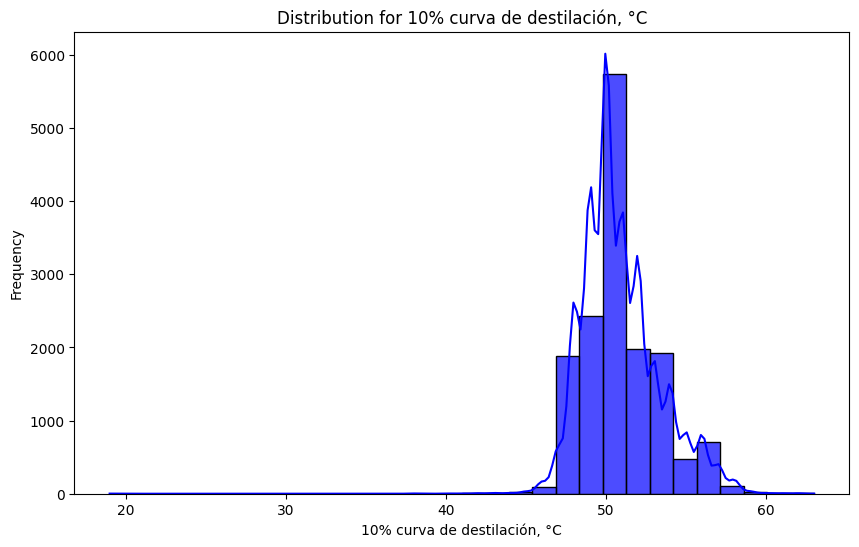

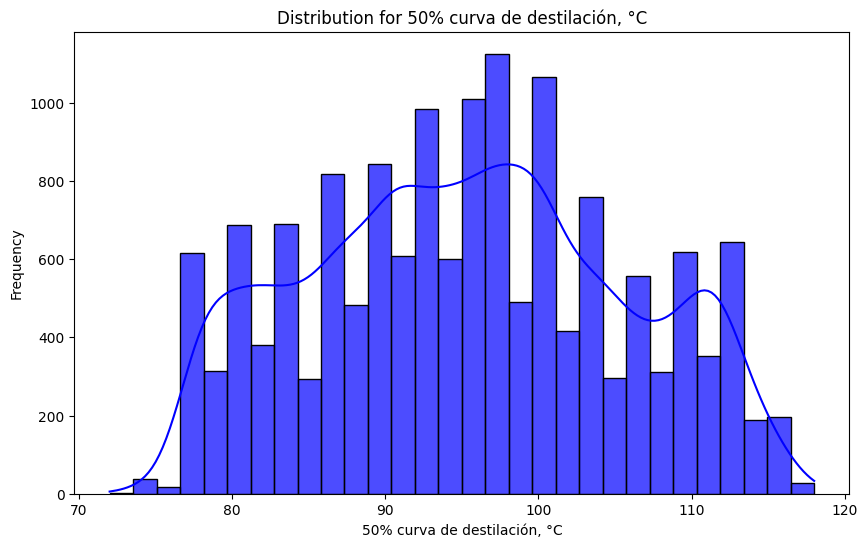

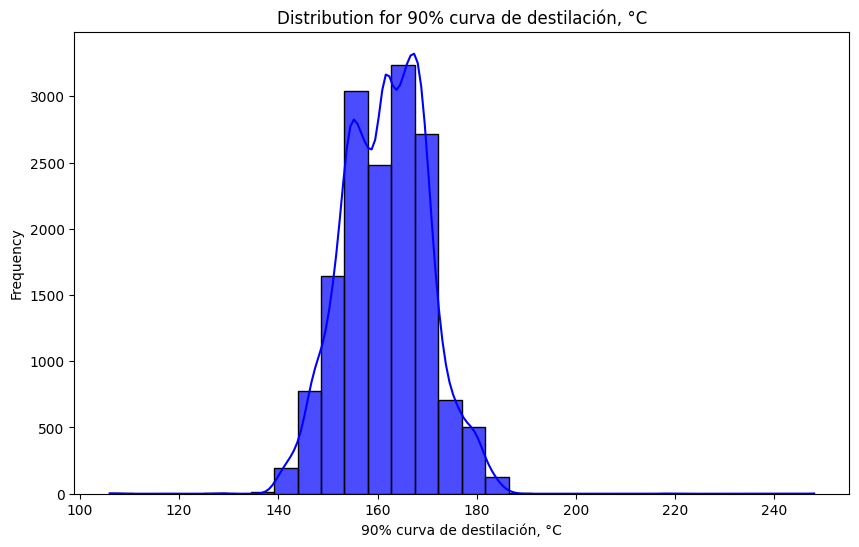

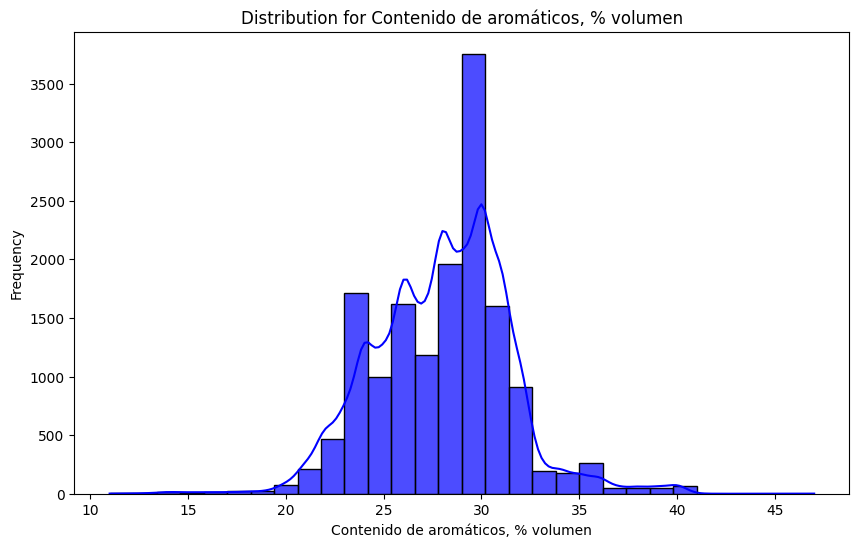

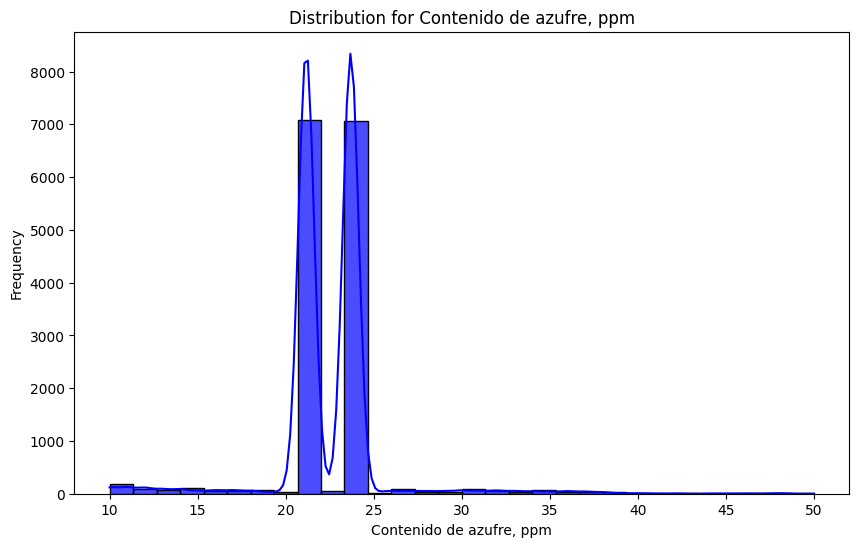

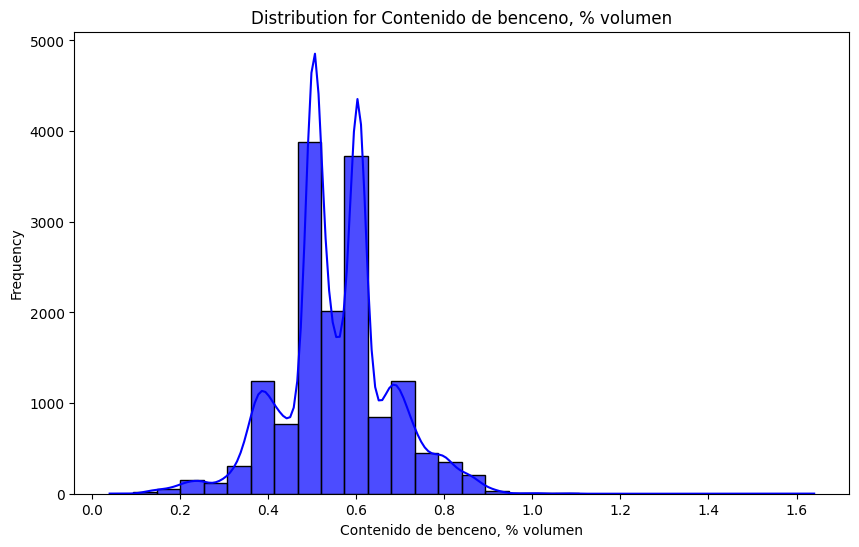

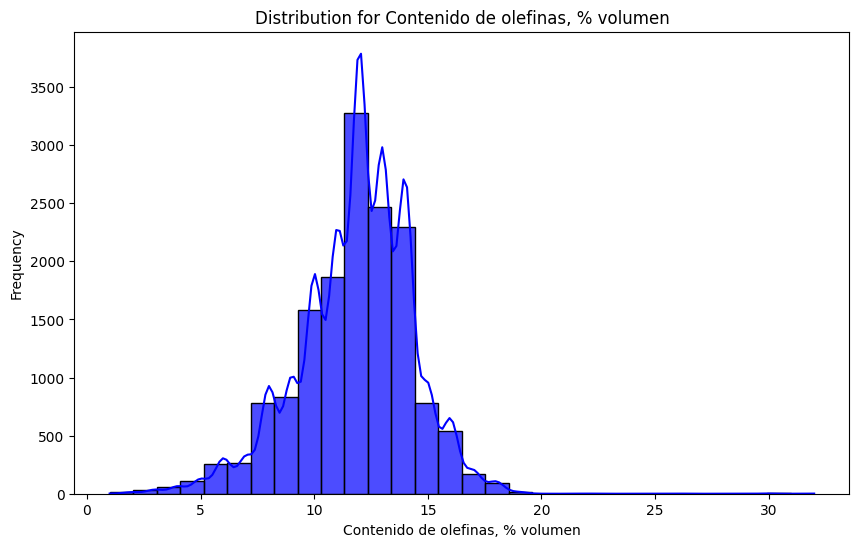

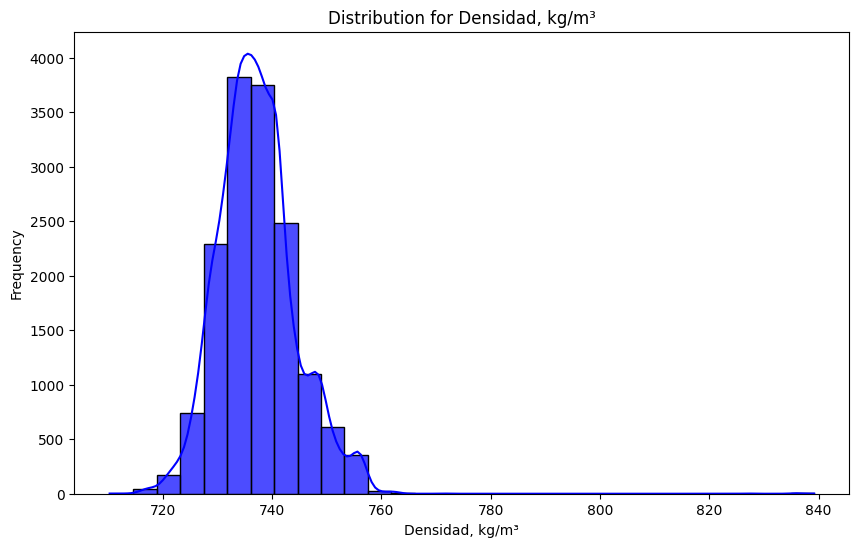

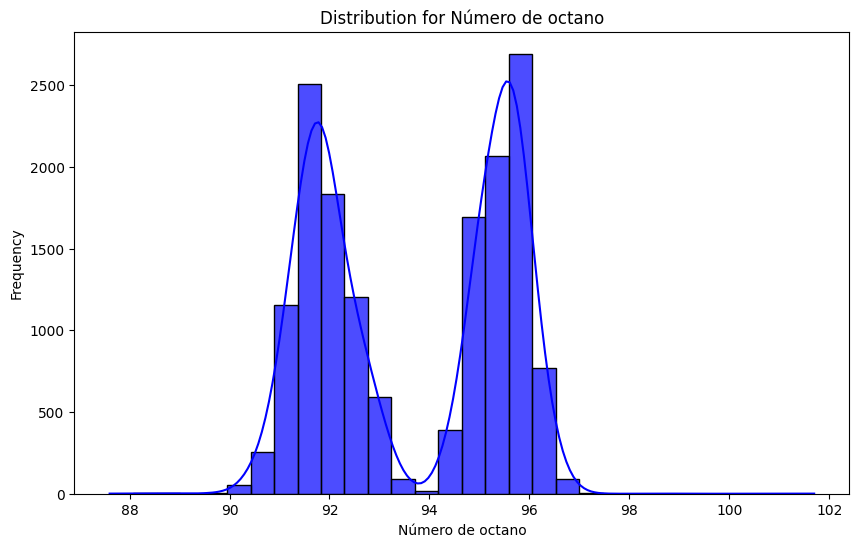

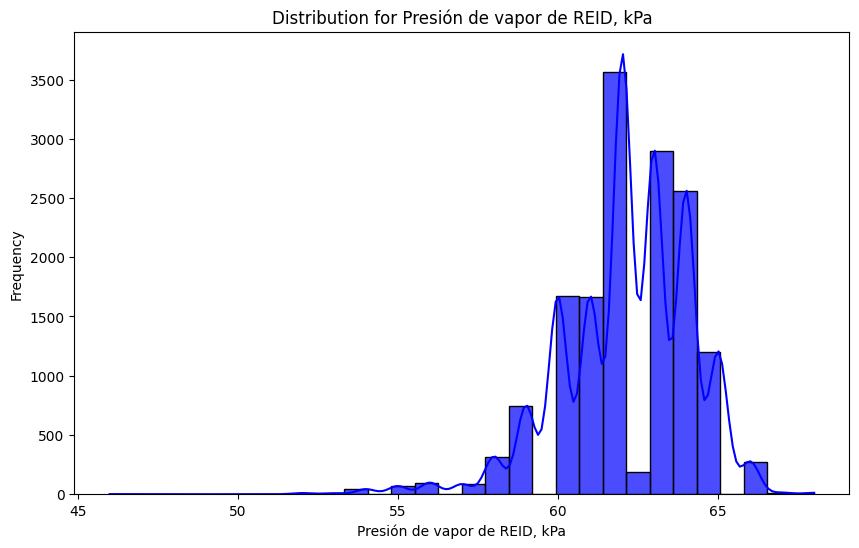

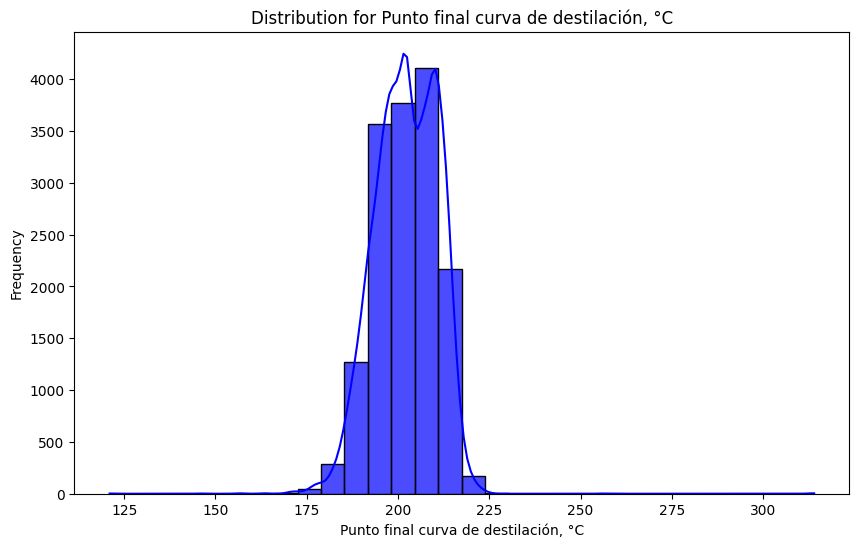

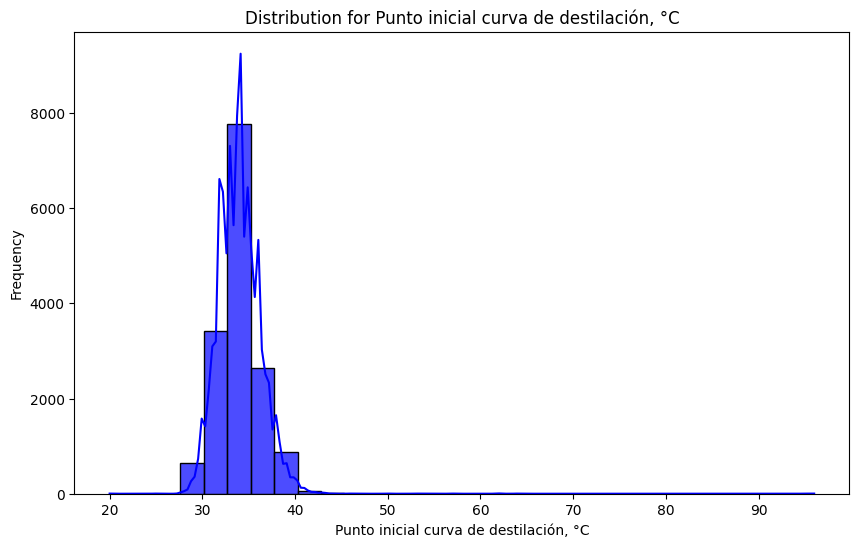

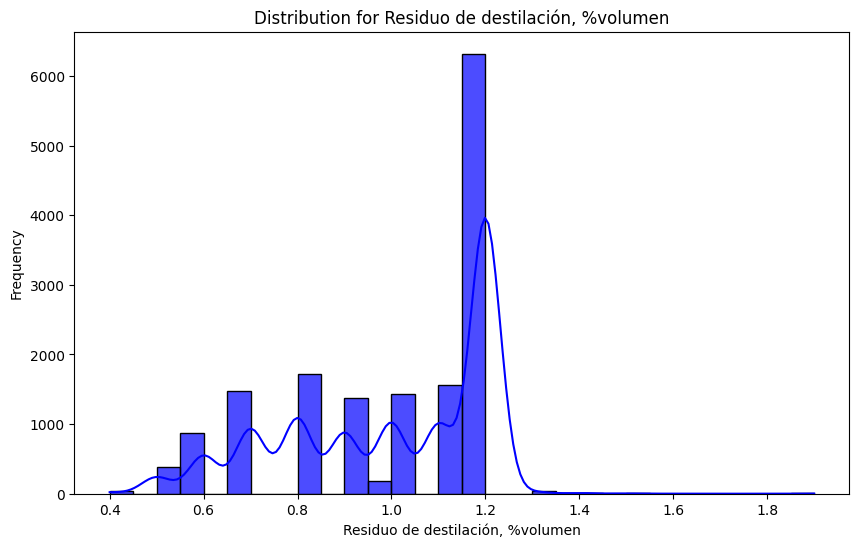

       10% curva de destilación, °C  50% curva de destilación, °C  \
count                  15426.000000                  15426.000000   
mean                      50.879792                     95.307988   
std                        2.390883                     10.184838   
min                       19.000000                     72.000000   
25%                       49.000000                     88.000000   
50%                       50.000000                     95.000000   
75%                       52.000000                    103.000000   
max                       63.000000                    118.000000   

       90% curva de destilación, °C  Contenido de aromáticos, % volumen  \
count                  15426.000000                        15426.000000   
mean                     161.691681                           28.004154   
std                        8.483394                            3.443861   
min                      106.000000                           11.000000   
25%

In [ ]:
for column in columns_to_treat:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], kde=True, bins=30, color='blue', alpha=0.7)
    plt.title(f'Distribution for {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()
print(df.describe())
print(df.head(30))

As can be seen, we have sine outliersm, especially in columns like 10% temperature, where the graph gets stretched a lot. For this, we'll apply data removal to values 3 stds away from the mean, which will eliminate data that is outside of the 99.7% percentile. We'll also change the date to UTC.

In [ ]:
# We switch to UTC
df['Fecha de visita'] = pd.to_datetime(df['Fecha de visita'], utc=True)

# We define the data columns that need to have outliers removed.
columns_to_treat = [
    "10% curva de destilación, °C", "50% curva de destilación, °C", "90% curva de destilación, °C",
    "Contenido de aromáticos, % volumen", "Contenido de benceno, % volumen",
    "Contenido de olefinas, % volumen", "Densidad, kg/m³", "Punto final curva de destilación, °C",
    "Punto inicial curva de destilación, °C"
]

# Create a boolean mask for the columns to modify.
mask = pd.DataFrame(True, index=df.index, columns=columns_to_treat)
#  For loop to remove values 3 std above or below the mean.
for col in columns_to_treat:
    if col in df.columns:
      # Calculate the mean and std, then remove values above or below 3 std from the mean, saving true or false in the mask.
        mean = df[col].mean()
        std = df[col].std()
        mask[col] = (df[col] >= mean - 3 * std) & (df[col] <= mean + 3 * std)

# Combine all boolean masks to remove rows that have at least 1 false.
final_mask = mask.all(axis=1)
# Include only rows that have all true for the std.
df_filtered = df[final_mask]
#Copy to the original DF
df = df_filtered.copy()

Now, we can create new graphs to show the effects of clipping the outliers.

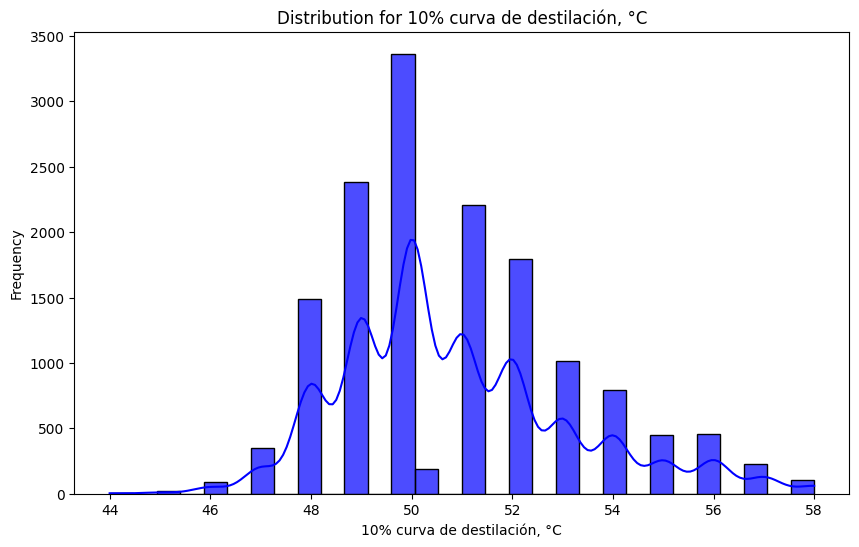

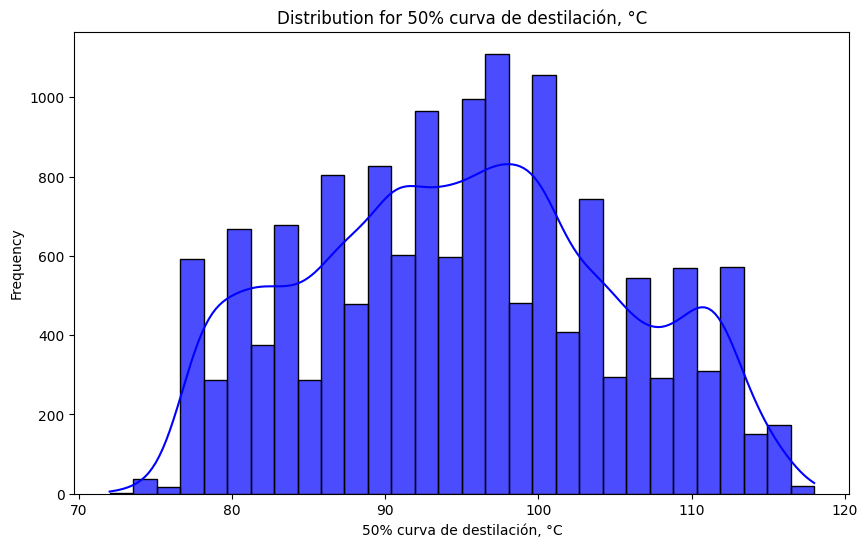

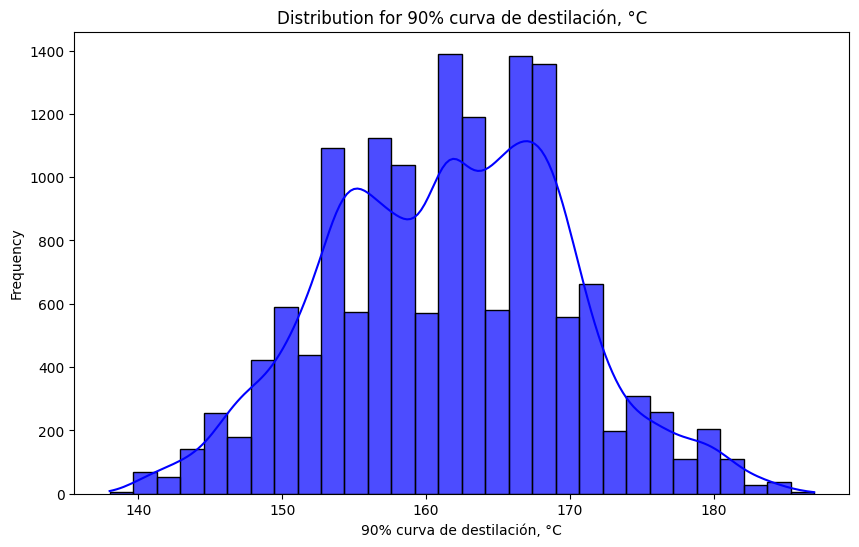

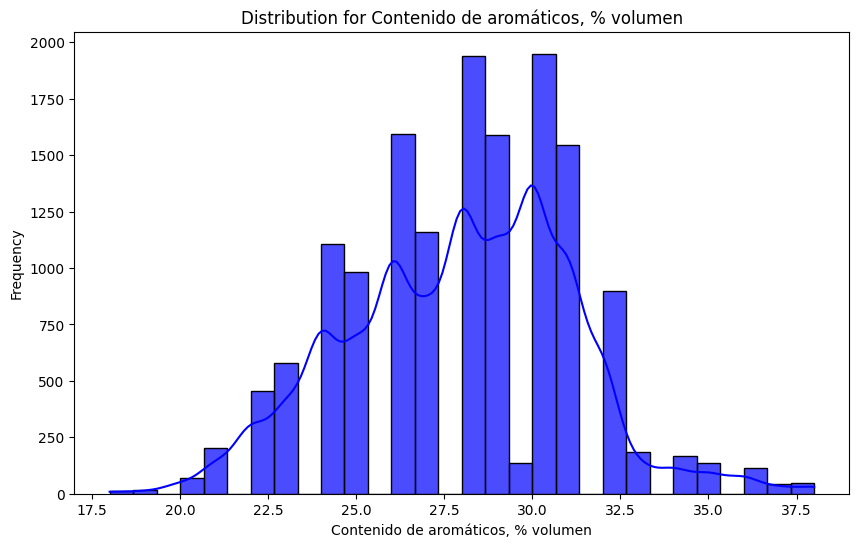

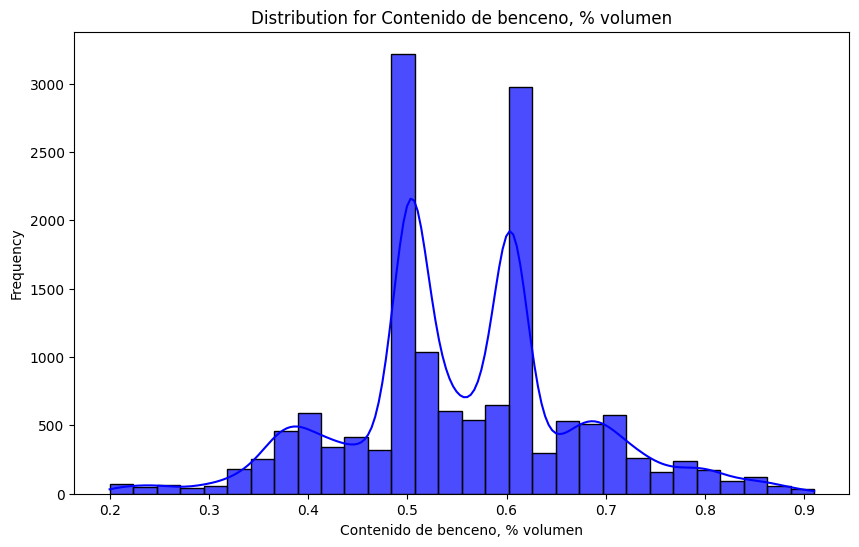

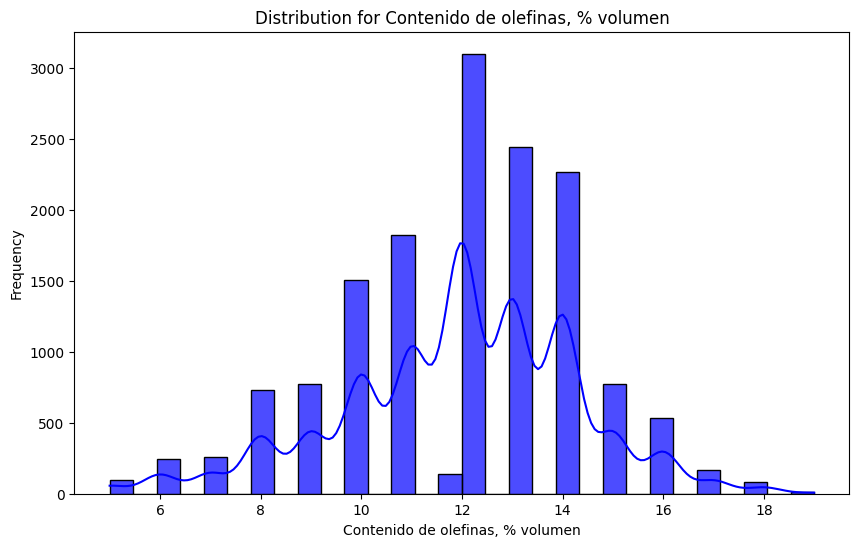

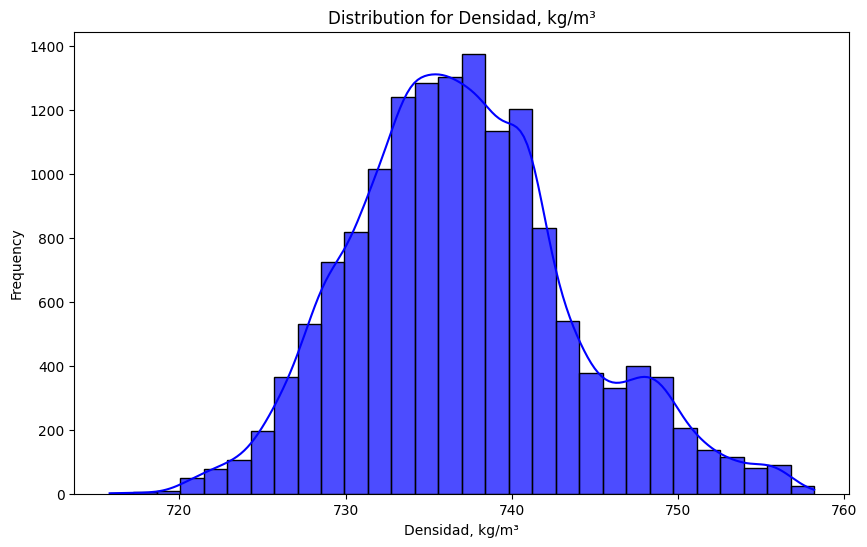

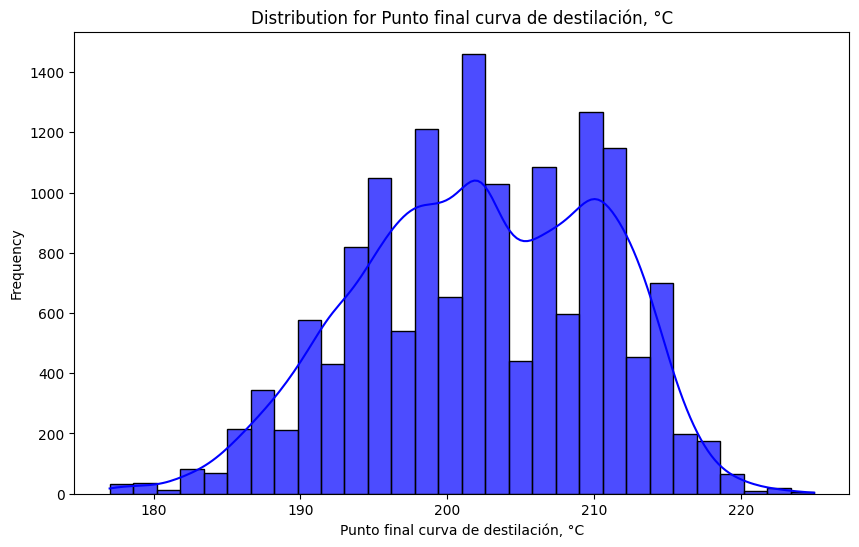

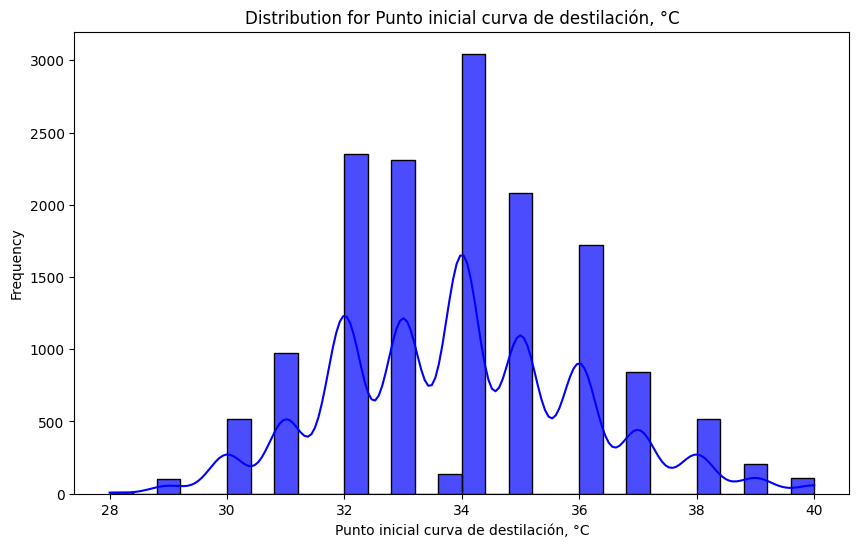

       10% curva de destilación, °C  50% curva de destilación, °C  \
count                  14940.000000                  14940.000000   
mean                      50.848372                     95.114995   
std                        2.313398                     10.022527   
min                       44.000000                     72.000000   
25%                       49.000000                     87.000000   
50%                       50.000000                     95.000000   
75%                       52.000000                    102.000000   
max                       58.000000                    118.000000   

       90% curva de destilación, °C  Contenido de aromáticos, % volumen  \
count                  14940.000000                        14940.000000   
mean                     161.605748                           27.942102   
std                        8.375988                            3.204926   
min                      138.000000                           18.000000   
25%

In [ ]:
for column in columns_to_treat:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], kde=True, bins=30, color='blue', alpha=0.7)
    plt.title(f'Distribution for {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()
print(df.describe())
print(df.head(30))

We now remove any remaining NANs and count the final columns.

In [ ]:
# Count the initial count
initial_row_count = df.shape[0]
# Remove NANs and duplicates
df = df.drop_duplicates()
df = df.dropna()
# Count the final rows.
final_row_count = df.shape[0]
# Display the final rows and the ones removed.
rows_removed = initial_row_count - final_row_count
print(f"Initial row count: {initial_row_count}")
print(f"Final row count: {final_row_count}")
print(f"Total rows removed: {rows_removed}")

Initial row count: 14940
Final row count: 14916
Total rows removed: 24


## Feature Selection

Now that we have a clean dataset, we proceed to find out which columns are the most relevant for our models later on. We are going to do 2 types of models, regression and clasification. These require different metrics, so we calculate 2 different sets. First, we start with the clasification.

In [ ]:
# Select numeric columns
columns_to_treat = [
    "10% curva de destilación, °C", "50% curva de destilación, °C", "90% curva de destilación, °C",
    "Contenido de aromáticos, % volumen", "Contenido de azufre, ppm", "Contenido de benceno, % volumen",
    "Contenido de olefinas, % volumen", "Densidad, kg/m³",
    "Presión de vapor de REID, kPa", "Punto final curva de destilación, °C",
    "Punto inicial curva de destilación, °C", "Residuo de destilación, %volumen"
]
# Change Producto to an ordinal encoder so we can calculate the feature importance and metrics.
encoder = OrdinalEncoder(cols=["Producto"])
df_encoded = encoder.fit_transform(df)
# Define the training variables for feature selection.
X_train = df_encoded[columns_to_treat]
y_train = df_encoded['Producto']
#Divide the Data 70/30
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Initiate arrays to save the metrics
anova_fvalues = []
chi2_scores = []
gain_ratios = []
#Start the for loop to calculate the metrics
for col in columns_to_treat:
    anova_fvalue, _ = f_classif(X_train[[col]], y_train)
    chi2_score, _ = chi2(X_train[[col]], y_train)
    gain_ratio = mutual_info_classif(X_train[[col]], y_train, discrete_features=False)[0]
    anova_fvalues.append(anova_fvalue[0])
    chi2_scores.append(chi2_score[0])
    gain_ratios.append(gain_ratio)
# Save the values
results = pd.DataFrame({'Column': columns_to_treat, 'ANOVA F-value': anova_fvalues, 'Chi2 Score': chi2_scores, 'Gain Ratio': gain_ratios})
# Create a random forest classifier to obtain freature importance
clf = RandomForestClassifier()
# Train the feature importance classifier
clf.fit(X_train, y_train)
# Extract feature importance
feature_importance = clf.feature_importances_
# Save and print the final
results['Feature Importance'] = feature_importance
print(results.sort_values('ANOVA F-value', ascending=False))

                                    Column  ANOVA F-value   Chi2 Score  \
3       Contenido de aromáticos, % volumen    6933.211589  1742.233841   
7                          Densidad, kg/m³    5341.786114   238.068445   
1             50% curva de destilación, °C    3970.461092  3315.675511   
5          Contenido de benceno, % volumen    3313.854442    66.049802   
4                 Contenido de azufre, ppm    3061.374168  1087.657586   
0             10% curva de destilación, °C     810.747844    81.011325   
6         Contenido de olefinas, % volumen      44.225677    20.102452   
10  Punto inicial curva de destilación, °C      41.232545     5.337106   
9     Punto final curva de destilación, °C      35.624348    12.018803   
11        Residuo de destilación, %volumen      14.496696     0.688265   
8            Presión de vapor de REID, kPa       0.410395     0.026334   
2             90% curva de destilación, °C       0.128103     0.055629   

    Gain Ratio  Feature Importance  


Because ANOVA is the most important when classifying discrete variables with continuous training variables, we use the first 5 in the ANOVA column as our top 5 features.

Now, we shift the 2 correlation metrics to be used for our regression calculations

In [ ]:

# Define the columns used for training
columns_to_use = [
    "10% curva de destilación, °C", "50% curva de destilación, °C", "90% curva de destilación, °C",
    "Contenido de aromáticos, % volumen", "Contenido de azufre, ppm", "Contenido de benceno, % volumen",
    "Contenido de olefinas, % volumen", "Densidad, kg/m³",
    "Presión de vapor de REID, kPa", "Punto final curva de destilación, °C",
    "Punto inicial curva de destilación, °C", "Residuo de destilación, %volumen"
]
# Define the target
target_column = "Número de octano"
results = []
# Start obtaining the metrics from the libraries imported
for col in columns_to_use:
    r2 = r2_score(df[target_column], df[col])
    pearson_corr, _ = pearsonr(df[target_column], df[col])
    spearman_corr, _ = spearmanr(df[target_column], df[col])
    # Append the results to a DF
    results.append({
        "Feature": col,
        "R2": r2,
        "Pearson Correlation": pearson_corr,
        "Spearman Correlation": spearman_corr
    })
# Gather the result for spearman and pearson correlations.
results_df = pd.DataFrame(results).sort_values(by="Spearman Correlation", ascending=False)
# Print the DF
print(results_df)
# Finally, after we have gathered the most important features, use a Standard Scaler on all the training, numerical columns that will be uised in classification and regression.
columns_to_scale = [
    "10% curva de destilación, °C", "50% curva de destilación, °C", "90% curva de destilación, °C",
    "Contenido de aromáticos, % volumen", "Contenido de azufre, ppm", "Contenido de benceno, % volumen",
    "Contenido de olefinas, % volumen", "Densidad, kg/m³",
    "Presión de vapor de REID, kPa", "Punto final curva de destilación, °C",
    "Punto inicial curva de destilación, °C", "Residuo de destilación, %volumen"
]
# Apply standard scaler
scaler = StandardScaler()
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

# Create Label encoded column for the classification challenges
label_encoder = LabelEncoder()
df['Producto_encoded'] = label_encoder.fit_transform(df['Producto'])

print(df.head())

                                   Feature             R2  \
3       Contenido de aromáticos, % volumen   -1195.987852   
7                          Densidad, kg/m³ -114591.377696   
1             50% curva de destilación, °C     -23.547674   
0             10% curva de destilación, °C    -507.824269   
2             90% curva de destilación, °C   -1297.389324   
9     Punto final curva de destilación, °C   -3282.653803   
11        Residuo de destilación, %volumen   -2375.833169   
10  Punto inicial curva de destilación, °C    -987.778383   
6         Contenido de olefinas, % volumen   -1849.161698   
8            Presión de vapor de REID, kPa    -275.451789   
5          Contenido de benceno, % volumen   -2398.736025   
4                 Contenido de azufre, ppm   -1407.102294   

    Pearson Correlation  Spearman Correlation  
3              0.536248              0.506776  
7              0.505165              0.489026  
1              0.461854              0.442885  
0             

# Classifier training

In this section we propose 6 classifiers, 3 using methods studied in class and 3 using more advanced methods.

We used the relevant characteristic analysis to get a baseline of best performance for the classifiers, but we also used the easily-obtainable physical characteristics of gas to see if it was possible to build a device to identify if gas is high-octane (Super) or low-octane (Regular) for cheap.

## Train/Test split

For every model we perform an 80%/20% split. We train each model twice, one for the relevant characteristics and one for the easily-obtainable physical characteristics.

### Characteristics identified in the Most Relevant Characteristic Analysis

In [ ]:
X_columns = [
    "Contenido de aromáticos, % volumen",
    "Densidad, kg/m³",
    "50% curva de destilación, °C",
    "Contenido de benceno, % volumen",
    "Contenido de azufre, ppm",
]
y_column = "Producto_encoded"

X = df[X_columns]
y = df[y_column]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Characteristics identified as Easily-Obtainable physical characteristics

In [ ]:
X_columns = ['Densidad, kg/m³', "Punto inicial curva de destilación, °C", '50% curva de destilación, °C', '10% curva de destilación, °C', '90% curva de destilación, °C', 'Punto final curva de destilación, °C', "Residuo de destilación, %volumen"]

y_column = "Producto_encoded"
X_phy = df[X_columns]
y_phy = df[y_column]

# Split the data into training and testing sets
X_train_phy, X_test_phy, y_train_phy, y_test_phy = train_test_split(X_phy, y_phy, test_size=0.2, random_state=42)

## Classification Model Training

For every classification model we use Grid Search with a variety of hyper-parameters to find the best fitting ones for our problem.

### Simple classifiers

#### Logistic Regression

As baseline we can use a Logisitic Regressor Classifier as it is a simple to use classifier.

##### Most Relevant Characterstic Model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Define the parameter grid for Logistic Regression
param_grid = {
  'C': [0.01, 0.1, 1, 10, 100],
  'solver': ['liblinear', 'lbfgs']
}

# Initialize the Logistic Regression classifier
log_reg = LogisticRegression(max_iter=1000)

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print("Best Parameters:", best_params)

# Predict on the test set
y_pred_lr = best_estimator.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred_lr))


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters: {'C': 0.1, 'solver': 'lbfgs'}
              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1509
           1       0.86      0.84      0.85      1475

    accuracy                           0.85      2984
   macro avg       0.85      0.85      0.85      2984
weighted avg       0.85      0.85      0.85      2984



##### Easily-obtainable Physical characteristic model

Now let build te same classifier but this time let's use the easily-obtainable physical characteristics.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Define the parameter grid for Logistic Regression
param_grid = {
  'C': [0.01, 0.1, 1, 10, 100],
  'solver': ['liblinear', 'lbfgs']
}

# Initialize the Logistic Regression classifier
log_reg = LogisticRegression(max_iter=1000)

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train_phy, y_train_phy)

# Get the best parameters and the best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print("Best Parameters:", best_params)

# Predict on the test set
y_pred_phy_lr = best_estimator.predict(X_test_phy)

# Print the classification report
print(classification_report(y_test_phy, y_pred_phy_lr))

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters: {'C': 0.1, 'solver': 'liblinear'}
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      1509
           1       0.87      0.86      0.86      1475

    accuracy                           0.87      2984
   macro avg       0.87      0.87      0.87      2984
weighted avg       0.87      0.87      0.87      2984



In this particular case we can notice that the training results for the easily obtainable characteristics is better than the ones for the Most Relevant Characteristics. We will soon see that this is not the same for the rest of the classifiers.

#### Support Vector Machine

##### Most Relevant Characteristic Model

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Define the parameter grid for SVM

# param_grid = {
#   'C': [0.01, 0.1, 1, 10, 100],
#   'kernel': ['linear', 'rbf', 'poly'],
#   'gamma': ['scale', 'auto']
# }

param_grid = {
    'C': [100],
    'kernel': ['rbf'],
    'gamma': ['scale']
}

# Initialize the SVM classifier
svm_clf = SVC()

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=svm_clf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print("Best Parameters:", best_params)

# Predict on the test set
y_pred_svm = best_estimator.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred_svm))

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Best Parameters: {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1509
           1       1.00      1.00      1.00      1475

    accuracy                           1.00      2984
   macro avg       1.00      1.00      1.00      2984
weighted avg       1.00      1.00      1.00      2984



##### Easily-obtainable Physical characteristic model

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Define the parameter grid for SVM

# param_grid = {
#   'C': [0.01, 0.1, 1, 10, 100],
#   'kernel': ['linear', 'rbf', 'poly'],
#   'gamma': ['scale', 'auto']
# }

param_grid = {
    'C': [100],
    'kernel': ['rbf'],
    'gamma': ['scale']
}

# Initialize the SVM classifier
svm_clf = SVC()

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=svm_clf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train_phy, y_train_phy)

# Get the best parameters and the best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print("Best Parameters:", best_params)

# Predict on the test set
y_pred_phy_svm = best_estimator.predict(X_test_phy)

# Print the classification report
print(classification_report(y_test_phy, y_pred_phy_svm))

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Best Parameters: {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}
              precision    recall  f1-score   support

           0       0.93      0.92      0.93      1509
           1       0.92      0.93      0.92      1475

    accuracy                           0.92      2984
   macro avg       0.92      0.92      0.92      2984
weighted avg       0.92      0.92      0.92      2984



#### Random Forest

##### Most Relevant Characteristic Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Define the parameter grid for Random Forest

# param_grid = {
#   'n_estimators': [50, 100, 200],
#   'max_depth': [None, 10, 20, 30],
#   'min_samples_split': [2, 5, 10],
#   'min_samples_leaf': [1, 2, 4]
# }
param_grid = {
  'n_estimators': [50],
  'max_depth': [None],
  'min_samples_split': [2],
  'min_samples_leaf': [1]
}

# Initialize the Random Forest classifier
rf_clf = RandomForestClassifier()

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=rf_clf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print("Best Parameters:", best_params)

# Predict on the test set
y_pred_rf = best_estimator.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred_rf))

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1509
           1       1.00      1.00      1.00      1475

    accuracy                           1.00      2984
   macro avg       1.00      1.00      1.00      2984
weighted avg       1.00      1.00      1.00      2984



##### Easily-obtainable Physical characteristic model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Define the parameter grid for Random Forest

# param_grid = {
#   'n_estimators': [50, 100, 200],
#   'max_depth': [None, 10, 20, 30],
#   'min_samples_split': [2, 5, 10],
#   'min_samples_leaf': [1, 2, 4]
# }

param_grid = {
  'n_estimators': [200],
  'max_depth': [30],
  'min_samples_split': [2],
  'min_samples_leaf': [1]
}

# Initialize the Random Forest classifier
rf_clf = RandomForestClassifier()

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=rf_clf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train_phy, y_train_phy)

# Get the best parameters and the best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print("Best Parameters:", best_params)

# Predict on the test set
y_pred_phy_rf = best_estimator.predict(X_test_phy)

# Print the classification report
print(classification_report(y_test_phy, y_pred_phy_rf))

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Best Parameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
              precision    recall  f1-score   support

           0       0.93      0.94      0.94      1509
           1       0.94      0.93      0.93      1475

    accuracy                           0.93      2984
   macro avg       0.94      0.93      0.93      2984
weighted avg       0.93      0.93      0.93      2984



### Advanced Classifers

#### XGBoost

##### Most Relevant Characteristic Model

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Define the parameter grid
param_grid = {
  'n_estimators': [50, 100, 200],
  'max_depth': [3, 4, 5],
  'learning_rate': [0.01, 0.1, 0.2],
  'subsample': [0.8, 1.0],
  'colsample_bytree': [0.8, 1.0]
}

param_grid = {
  'n_estimators': [50],
  'max_depth': [4],
  'learning_rate': [0.01],
  'subsample': [1.0],
  'colsample_bytree': [0.8]
}

# Initialize the XGBoost classifier
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=xgb_clf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print("Best Parameters:", best_params)

# Predict on the test set
y_pred_xgb = best_estimator.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred_xgb))

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 50, 'subsample': 1.0}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1509
           1       1.00      1.00      1.00      1475

    accuracy                           1.00      2984
   macro avg       1.00      1.00      1.00      2984
weighted avg       1.00      1.00      1.00      2984



/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:46:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


##### Easily-obtainable Physical characteristic model

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Define the parameter grid
param_grid = {
  'n_estimators': [50, 100, 200],
  'max_depth': [3, 4, 5],
  'learning_rate': [0.01, 0.1, 0.2],
  'subsample': [0.8, 1.0],
  'colsample_bytree': [0.8, 1.0]
}
param_grid = {
  'n_estimators': [200],
  'max_depth': [5],
  'learning_rate': [0.2],
  'subsample': [0.8],
  'colsample_bytree': [1.0]
}

# Initialize the XGBoost classifier
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=xgb_clf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train_phy, y_train_phy)

# Get the best parameters and the best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print("Best Parameters:", best_params)

# Predict on the test set
y_pred_xgb_phy = best_estimator.predict(X_test_phy)

# Print the classification report
print(classification_report(y_test_phy, y_pred_xgb_phy))

Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:46:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1509
           1       0.93      0.93      0.93      1475

    accuracy                           0.93      2984
   macro avg       0.93      0.93      0.93      2984
weighted avg       0.93      0.93      0.93      2984



#### Neural Network Mode: Multilayer Perceptron (MLP)

##### Most Relevant Characteristic Model

In [ ]:
from sklearn.neural_network import MLPClassifier

# Define the parameter grid for MLPClassifier
param_grid = {
  'hidden_layer_sizes': [(50, 50), (100,)],
  'activation': ['tanh', 'relu'],
  'solver': ['sgd', 'adam'],
  'alpha': [0.0001, 0.05],
  'learning_rate': ['constant', 'adaptive'],
}
param_grid = {
  'hidden_layer_sizes': [(50, 50)],
  'activation': ['relu'],
  'solver': ['adam'],
  'alpha': [0.0001],
  'learning_rate': ['constant'],
}

# Initialize the MLPClassifier
mlp_clf = MLPClassifier(max_iter=1000)

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=mlp_clf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print("Best Parameters:", best_params)

# Predict on the test set
y_pred_mlp = best_estimator.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred_mlp))


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Best Parameters: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50), 'learning_rate': 'constant', 'solver': 'adam'}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1509
           1       1.00      1.00      1.00      1475

    accuracy                           1.00      2984
   macro avg       1.00      1.00      1.00      2984
weighted avg       1.00      1.00      1.00      2984



##### Easily-obtainable Physical characteristic model

In [ ]:
from sklearn.neural_network import MLPClassifier

# Define the parameter grid for MLPClassifier
param_grid = {
  'hidden_layer_sizes': [(50, 50), (100,)],
  'activation': ['tanh', 'relu'],
  'solver': ['sgd', 'adam'],
  'alpha': [0.0001, 0.05],
  'learning_rate': ['constant', 'adaptive'],
}
param_grid = {
  'hidden_layer_sizes': [(50, 50)],
  'activation': ['tanh'],
  'solver': ['adam'],
  'alpha': [0.05],
  'learning_rate': ['adaptive'],
}

# Initialize the MLPClassifier
mlp_clf = MLPClassifier(max_iter=1000)

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=mlp_clf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train_phy, y_train_phy)

# Get the best parameters and the best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print("Best Parameters:", best_params)

# Predict on the test set
y_pred_mlp_phy = best_estimator.predict(X_test_phy)

# Print the classification report
print(classification_report(y_test_phy, y_pred_mlp_phy))

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Best Parameters: {'activation': 'tanh', 'alpha': 0.05, 'hidden_layer_sizes': (50, 50), 'learning_rate': 'adaptive', 'solver': 'adam'}
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1509
           1       0.93      0.93      0.93      1475

    accuracy                           0.93      2984
   macro avg       0.93      0.93      0.93      2984
weighted avg       0.93      0.93      0.93      2984



## Classification Results

# Regression Training

Now that we have successfully trained a classification model, there is a remaining characteristic to be studied. As explained above, we need to also measure the octane without a direct measurement. Because the octane is a continuous variable and the training columns are also continuous, we will use 3 regression models.

## Polynomial Regression

The first regression to be used will be Polynomial. This is because a polynomial model with a variable grade will allow us to measure more non linear relationships, as well as test linear regression all in one, when the grade is 1. First, we define two training sets. The first are the parameters gotten with feature selection, while the other ones are the "easy to measure" ones used in the clasification problems. Choose one depending on your desired outcome


In [ ]:
# First Dataset
X1 = df[["Contenido de aromáticos, % volumen", "Densidad, kg/m³", "50% curva de destilación, °C",
         "Contenido de benceno, % volumen", "Contenido de azufre, ppm"]].values
y = df["Número de octano"].values

# Second Dataset
X2 = df[["Densidad, kg/m³", "Punto inicial curva de destilación, °C", "50% curva de destilación, °C",
         "10% curva de destilación, °C", "90% curva de destilación, °C", "Punto final curva de destilación, °C",
         "Residuo de destilación, %volumen"]].values

Now, we create some auxiliary functions to calculate regression matrics.

In [ ]:
# RMSPE calculation
def rmspe(y_true, y_pred):
    return torch.sqrt(torch.mean(((y_true - y_pred) / y_true) ** 2)).item() * 100

In [ ]:
# Function to compute MAE, MSE, RMSE
def compute_metrics(y_true, y_pred):
    mae = torch.mean(torch.abs(y_true - y_pred)).item()
    mse = torch.mean((y_true - y_pred) ** 2).item()
    rmse = torch.sqrt(torch.mean((y_true - y_pred) ** 2)).item()
    return mae, mse, rmse

Next, we define the main function to execute the poly regression, using CUDA to speed up the process. This code was reused from Lab 3.

In [ ]:
# Function to process data and perform polynomial regression
def process_poly_regression(X, y, dataset_name):
    # Split into training and test sets (70/30)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Convert data to PyTorch tensors and move to CUDA if available
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    X_train = torch.tensor(X_train, dtype=torch.float32).to(device)
    y_train = torch.tensor(y_train, dtype=torch.float32).to(device)
    X_test = torch.tensor(X_test, dtype=torch.float32).to(device)
    y_test = torch.tensor(y_test, dtype=torch.float32).to(device)

    # Array to absorb results
    results = []

    # Loop through polynomial degrees 1 to 9
    for degree in range(1, 10):
        # Generate polynomial features for poly regression
        poly_features_train = torch.cat([X_train ** i for i in range(1, degree + 1)], dim=1)
        poly_features_test = torch.cat([X_test ** i for i in range(1, degree + 1)], dim=1)

        # Define linear regression model
        model = nn.Linear(poly_features_train.shape[1], 1).to(device)

        # Define loss function and optimizer
        criterion = nn.MSELoss()
        optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

        # Training loop for 15000 epocs
        for epoch in range(15000):
            model.train()
            optimizer.zero_grad()
            y_pred_train = model(poly_features_train).squeeze()
            loss = criterion(y_pred_train, y_train)
            loss.backward()
            optimizer.step()

        # Evaluate on training and test data
        model.eval()
        with torch.no_grad():
            y_pred_train = model(poly_features_train).squeeze()
            y_pred_test = model(poly_features_test).squeeze()

            # Compute metrics
            train_rmspe = rmspe(y_train, y_pred_train)
            test_rmspe = rmspe(y_test, y_pred_test)
            train_mae, train_mse, train_rmse = compute_metrics(y_train, y_pred_train)
            test_mae, test_mse, test_rmse = compute_metrics(y_test, y_pred_test)

        # Store results
        results.append((degree, train_rmspe, test_rmspe, train_mae, test_mae, train_mse, test_mse, train_rmse, test_rmse))

    # Convert results to DataFrame for better visualization
    results_df = pd.DataFrame(results, columns=[
        "Degree", "Train RMSPE", "Test RMSPE", "Train MAE", "Test MAE",
        "Train MSE", "Test MSE", "Train RMSE", "Test RMSE"
    ])

    print(f"Results for {dataset_name}:")
    print(results_df)

    # Plot RMSPE against polynomial degree
    plt.figure(figsize=(10, 6))
    plt.plot(results_df["Degree"], results_df["Train RMSPE"], label="Train RMSPE", marker='o')
    plt.plot(results_df["Degree"], results_df["Test RMSPE"], label="Test RMSPE", marker='o')
    plt.xlabel("Polynomial Degree")
    plt.ylabel("RMSPE (%)")
    plt.title(f"RMSPE vs Polynomial Degree ({dataset_name})")
    plt.legend()
    plt.grid(True)
    plt.show()

Finally, we execute the functions for both sets.

Results for Dataset 1 (Original Features):
   Degree  Train RMSPE  Test RMSPE  Train MAE   Test MAE   Train MSE  \
0       1     1.480219    1.510997   1.146516   1.167241    1.912956   
1       2     1.460985    1.489551   1.133876   1.155620    1.867058   
2       3     1.368611    1.382475   1.012595   1.031611    1.634701   
3       4     1.212474    1.238324   0.847995   0.871807    1.283470   
4       5     1.213950    1.239666   0.850116   0.873397    1.284360   
5       6     1.631141    1.651241   1.163947   1.179086    2.328538   
6       7     3.360515    3.199847   2.514132   2.467382    9.876201   
7       8     9.957206    9.888593   7.298110   7.293300   87.057777   
8       9    33.605725   34.502557  24.387383  24.691216  986.991150   

      Test MSE  Train RMSE  Test RMSE  
0     1.994509    1.383097   1.412271  
1     1.940034    1.366403   1.392851  
2     1.669040    1.278554   1.291913  
3     1.337469    1.132903   1.156490  
4     1.339668    1.133296   1.15744

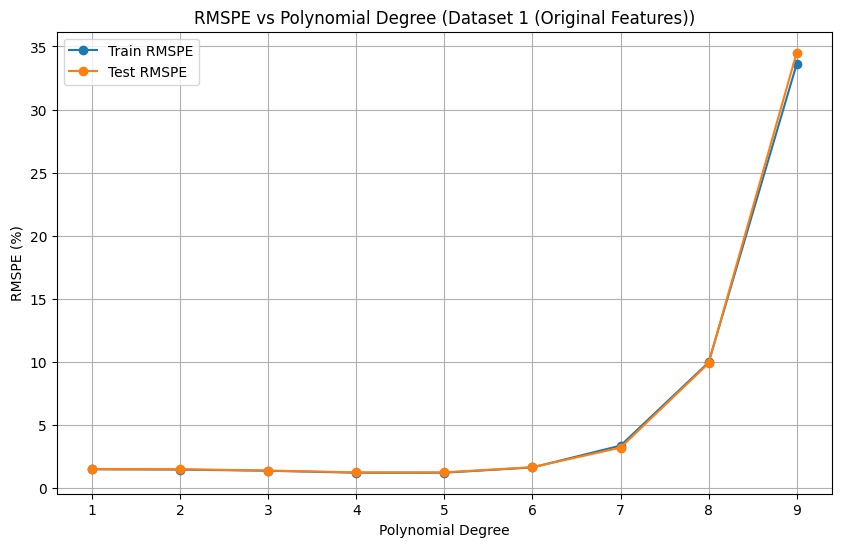

Results for Dataset 2 (New Features):
   Degree  Train RMSPE  Test RMSPE  Train MAE  Test MAE  Train MSE   Test MSE  \
0       1     1.469694    1.467667   1.145720  1.137570   1.881773   1.874686   
1       2     1.403685    1.409019   1.078147  1.076776   1.719092   1.732795   
2       3     1.378898    1.392454   1.042730  1.051286   1.658051   1.690361   
3       4     1.380562    1.398118   1.040954  1.048234   1.664777   1.706807   
4       5     1.376334    1.395737   1.035826  1.044155   1.654302   1.700258   
5       6     1.439641    1.460447   1.084702  1.090668   1.811171   1.862662   
6       7     1.494247    1.513087   1.115859  1.123751   1.948567   1.997285   
7       8     4.321311    4.491651   2.671776  2.736839  16.425301  17.798559   
8       9     2.917640    3.301463   2.153972  2.192513   7.447914   9.474514   

   Train RMSE  Test RMSE  
0    1.371777   1.369192  
1    1.311142   1.316357  
2    1.287653   1.300139  
3    1.290262   1.306448  
4    1.286197   

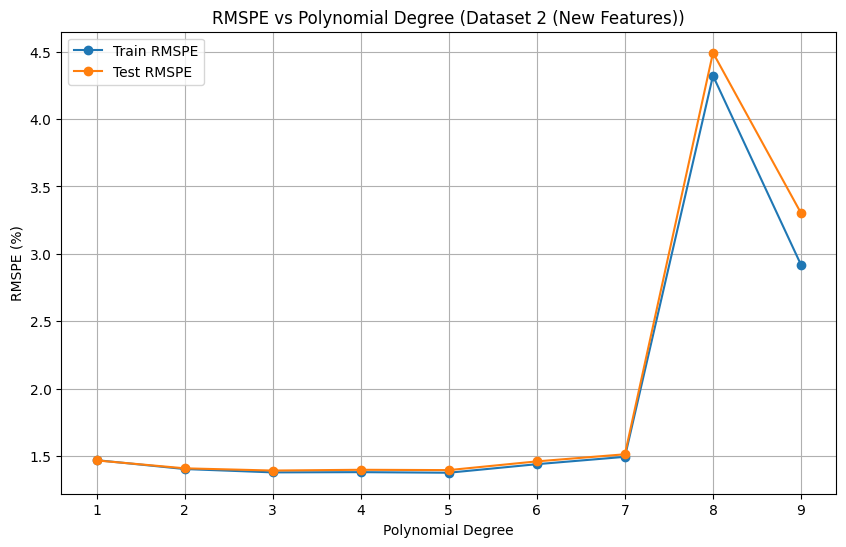

In [ ]:
# Run polynomial regression for both datasets
process_poly_regression(X1, y, "Dataset 1 (Original Features)")
process_poly_regression(X2, y, "Dataset 2 (New Features)")

As can be seen, there's a difference of about 0,1785% between the error percentage between the optimal and the "easy to obtain" in the best scenario. In the case of the optimal, this was Grade 5, but it was Grade 3 for the easy to obtain columns.

## Ridge Regression

For Ridge or L2 regression, we also used the 2 datasets and calculated results for each. For a moving hyper-parameter, we used the alpha values in the Ridge formula β^ridge=(X′X+λIp)−1X′Y, which was varied and each result was calculated to select the best hyper parameter.

First, like in the Poly Regression, we define the columns to use for training. Once again, an optimal clumn arrangement was selected, paired with an "easy to measure" parameter column set.

In [ ]:
# Optimal Data
X1 = df[["Contenido de aromáticos, % volumen", "Densidad, kg/m³", "50% curva de destilación, °C", "Contenido de benceno, % volumen", "Contenido de azufre, ppm"]].values
# Easy to get data
X2 = df[["Densidad, kg/m³", "Punto inicial curva de destilación, °C", "50% curva de destilación, °C", "10% curva de destilación, °C", "90% curva de destilación, °C", "Punto final curva de destilación, °C",
         "Residuo de destilación, %volumen"]].values
# Target: Octane value to predict
y = df["Número de octano"].values

Next, we define the functions for metric calculation and hyper parameter varying, like we did in the polynomial.

In [ ]:
# Define alphas
alphas = [0.01, 0.1, 1, 10, 100, 500, 1000, 5000]

# Function to calculate metrics standard for regression
def calculate_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    rmspe = np.sqrt(np.mean(np.square(((y_true - y_pred) / y_true) * 100)))
    return mae, mse, rmse, rmspe

Now, we define the main function for a ridge regression using scikit learn

In [ ]:
# Function to train Ridge Regression and evaluate
def ridge_regression(X, y, alphas):
    results = []
    for alpha in alphas:
      # Start the ridge model
        ridge = Ridge(alpha=alpha)
        # Divide the data 80/20
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        # Start the fitting
        ridge.fit(X_train, y_train)

        # Predictions for train and test
        y_train_pred = ridge.predict(X_train)
        y_test_pred = ridge.predict(X_test)

        # Metrics for train and test
        train_metrics = calculate_metrics(y_train, y_train_pred)
        test_metrics = calculate_metrics(y_test, y_test_pred)

        # Append alpha, train RMSPE, and test RMSPE to results
        results.append((alpha, *train_metrics, *test_metrics))
    return results

Then, we run the model.

In [ ]:
# Evaluate for both datasets
results_X1 = ridge_regression(X1, y, alphas)
results_X2 = ridge_regression(X2, y, alphas)

Then, a table is created and a graph is made of Alpha vs RMSPE.


Metrics for Dataset X1:

  Alpha  Train MAE  Train MSE  Train RMSE  Train RMSPE  Test MAE  Test MSE  Test RMSE  Test RMSPE
   0.01   1.146834   1.912943    1.383092     1.480238  1.167504  1.994444   1.412248    1.510997
   0.10   1.146835   1.912943    1.383092     1.480238  1.167505  1.994443   1.412248    1.510997
   1.00   1.146847   1.912943    1.383092     1.480238  1.167512  1.994433   1.412244    1.510993
  10.00   1.146971   1.912944    1.383092     1.480238  1.167591  1.994338   1.412210    1.510958
 100.00   1.148205   1.913052    1.383131     1.480274  1.168414  1.993510   1.411917    1.510648
 500.00   1.153538   1.915091    1.383868     1.481040  1.172323  1.991849   1.411329    1.510042
1000.00   1.159936   1.919738    1.385546     1.482817  1.177169  1.992656   1.411615    1.510382
5000.00   1.205750   1.981672    1.407719     1.506486  1.216658  2.036954   1.427219    1.527288

Metrics for Dataset X2:

  Alpha  Train MAE  Train MSE  Train RMSE  Train RMSPE  Test MAE  

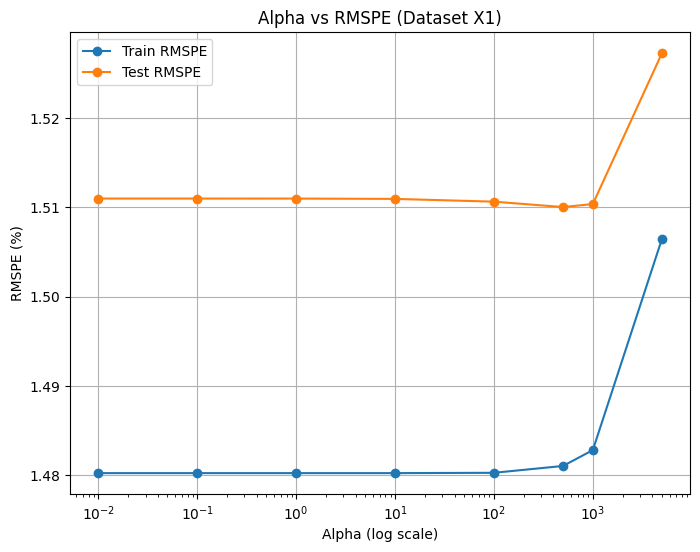

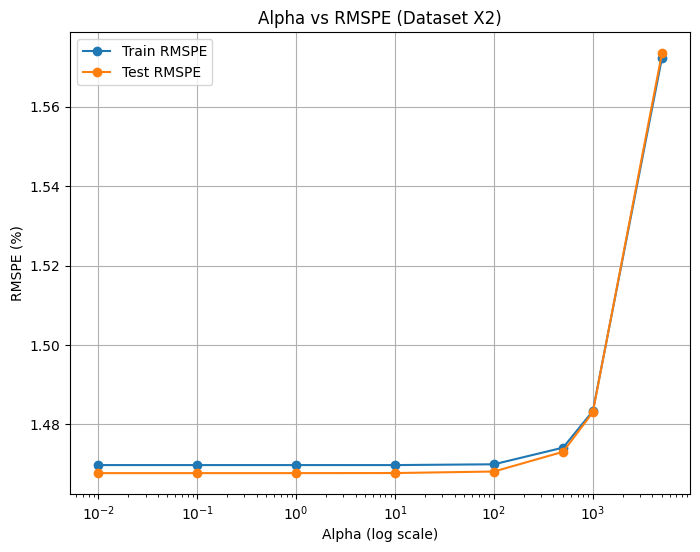

In [ ]:
# Create a table with metrics
def create_metrics_table(results, dataset_name):
    table = pd.DataFrame(results, columns=[
        "Alpha", "Train MAE", "Train MSE", "Train RMSE", "Train RMSPE",
        "Test MAE", "Test MSE", "Test RMSE", "Test RMSPE"
    ])
    print(f"\nMetrics for {dataset_name}:\n")
    print(table.to_string(index=False))
    return table

# Print the metrics table for each dataset
table_X1 = create_metrics_table(results_X1, "Dataset X1")
table_X2 = create_metrics_table(results_X2, "Dataset X2")
# Plot Alpha vs. RMSPE
def plot_rmspe(results, title):
    alphas = [r[0] for r in results]
     # Train RMSPE is at index 4
    train_rmspe = [r[4] for r in results]
    # Test RMSPE is at index 8
    test_rmspe = [r[8] for r in results]
    plt.figure(figsize=(8, 6))
    plt.plot(alphas, train_rmspe, label="Train RMSPE", marker='o')
    plt.plot(alphas, test_rmspe, label="Test RMSPE", marker='o')
    plt.xscale('log')
    plt.xlabel("Alpha (log scale)")
    plt.ylabel("RMSPE (%)")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

# Call plotting functions
plot_rmspe(results_X1, "Alpha vs RMSPE (Dataset X1)")
plot_rmspe(results_X2, "Alpha vs RMSPE (Dataset X2)")

## Random Forrest


The last regression to be use will be the Random Forest, in this case this one was selected due to its solid accuracy and that is less sensitive to overfitting, so in this case for the data selected, a good accuracy will be a good goal to achive.

Same as the other models presented, 2 set of data will be use to train the model, the optimal and the physical values. At the same time, hyperparameters were use to fit the model to achieve the best performance. This is shown below.

In [ ]:
# Optimal data
X1 = df[['Contenido de aromáticos, % volumen', 'Densidad, kg/m³', '50% curva de destilación, °C', 'Contenido de benceno, % volumen', 'Contenido de azufre, ppm']]
# Easy to get data (physical parameters)
X2 = df[['Densidad, kg/m³', '50% curva de destilación, °C', '10% curva de destilación, °C', '90% curva de destilación, °C', 'Punto inicial curva de destilación, °C', 'Punto final curva de destilación, °C', "Residuo de destilación, %volumen"]]

# Target: Octane value to predict
y = df['Número de octano']

# Hyperparameters definition:

# These are the original hyperparameters that were used to identify the best fit
# After identify the optimal, those were used in the param_grid1 and param_grid2
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_features': ['sqrt', 'log2'],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'bootstrap': [True, False]
# }

# Hyperparameters for Optimal data
param_grid1 = {
    'n_estimators': [300],
    'max_features': ['log2'],
    'max_depth': [None],
    'min_samples_split': [2],
    'min_samples_leaf': [1],
    'bootstrap': [False]
}

# Hyperparameters for Easy to get data
param_grid2 = {
    'n_estimators': [300],
    'max_features': ['sqrt'],
    'max_depth': [20],
    'min_samples_split': [5],
    'min_samples_leaf': [1],
    'bootstrap': [True]
}

Then, grid search will be evaluated:

In [ ]:
# Function to define the grid seach
def perform_grid_search(X, y, param_grid, test_size=0.2, random_state=42):

    # Split the data into training and testing sets (based on 80/20 --> training/test)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Model and grid initialize
    rf = RandomForestRegressor()
    grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
    grid_search.fit(X_train, y_train)

    # Prediction and metrics definition
    best_model = grid_search.best_estimator_
    y_test_pred = best_model.predict(X_test)
    y_train_pred = best_model.predict(X_train)

    # Speceific metrics for the model calculation
    metrics_test = calculate_metrics(y_test, y_test_pred)
    metrics_train = calculate_metrics(y_train, y_train_pred)

    return {
        "best_params": grid_search.best_params_,
        "metrics_test": metrics_test,
        "metrics_train": metrics_train,
        "y_test_pred": y_test_pred,
        "y_test": y_test,
        "y_train_pred": y_train_pred,
        "y_train": y_train
    }

After this, in order to get the necessary metrics to evaluate the model, the function to calculate it was implemented below

In [ ]:
# Function to calculate metrics of the model
def calculate_metrics(y_true, y_pred):
    mae = np.mean(np.abs(y_true - y_pred))
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    rmspe = np.sqrt(np.mean(((y_true - y_pred) / y_true)**2)) * 100
    return {"MAE": mae, "MSE": mse, "RMSE": rmse, "RMSPE": rmspe}

Finally, the results of each specific metric is printed below (this include both, training and test values for each model and each dataset):

In [ ]:
# Grid search for each of the data sets to be evaluate it. In this case X1 and X2
results_X1 = perform_grid_search(X1, y, param_grid1)
results_X2 = perform_grid_search(X2, y, param_grid2)

# Result for the Dataset X1 with 6 decimals
print("\nResults for Optimal Dataset - X1:")
print(f"  MAE TRAINING: {results_X1['metrics_train']['MAE']:.6f}")
print(f"  MAE TEST: {results_X1['metrics_test']['MAE']:.6f}")
print(f"  MSE TRAINING: {results_X1['metrics_train']['MSE']:.6f}")
print(f"  MSE TEST: {results_X1['metrics_test']['MSE']:.6f}")
print(f"  RMSE TRAINING: {results_X1['metrics_train']['RMSE']:.6f}")
print(f"  RMSE TEST: {results_X1['metrics_test']['RMSE']:.6f}")
print(f"  RMSPE TRAINING: {results_X1['metrics_train']['RMSPE']:.6f}")
print(f"  RMSPE TEST: {results_X1['metrics_test']['RMSPE']:.6f}")


# Results for the dataset X2 with 6 decimals
print("\nResults for Easiest Dataset - X2:")
print(f"  MAE TRAINING: {results_X2['metrics_train']['MAE']:.6f}")
print(f"  MAE TEST: {results_X2['metrics_test']['MAE']:.6f}")
print(f"  MSE TRAINING {results_X2['metrics_train']['MSE']:.6f}")
print(f"  MSE TEST: {results_X2['metrics_test']['MSE']:.6f}")
print(f"  RMSE TRAINING: {results_X2['metrics_train']['RMSE']:.6f}")
print(f"  RMSE TEST: {results_X2['metrics_test']['RMSE']:.6f}")
print(f"  RMSPE TRAINING: {results_X2['metrics_train']['RMSPE']:.6f}")
print(f"  RMSPE TEST: {results_X2['metrics_test']['RMSPE']:.6f}")

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits

Results for Optimal Dataset - X1:
  MAE TRAINING: 0.008458
  MAE TEST: 0.274259
  MSE TRAINING: 0.002158
  MSE TEST: 0.166646
  RMSE TRAINING: 0.046454
  RMSE TEST: 0.408223
  RMSPE TRAINING: 0.049644
  RMSPE TEST: 0.435986

Results for Easiest Dataset - X2:
  MAE TRAINING: 0.342878
  MAE TEST: 0.624568
  MSE TRAINING 0.265266
  MSE TEST: 0.853726
  RMSE TRAINING: 0.515040
  RMSE TEST: 0.923973
  RMSPE TRAINING: 0.551105
  RMSPE TEST: 0.988920


Lastly, in order to a better understanding, a Predicted vs Real values will be shown for both cases valuated. In this case the Optimal Dataset will be the first one and we will see that this model actually has a really good fit to the real values presented in the data set. From the other hand, when using the Easiest dataset, we can notice graphically that there is more instability in the prediction of gasoline octane numbers.

However, in both cases, there are two clear groupings, which correspond in this case to the regular and superior gasoline, thus identifying that the prediction is made in an adequate manner.

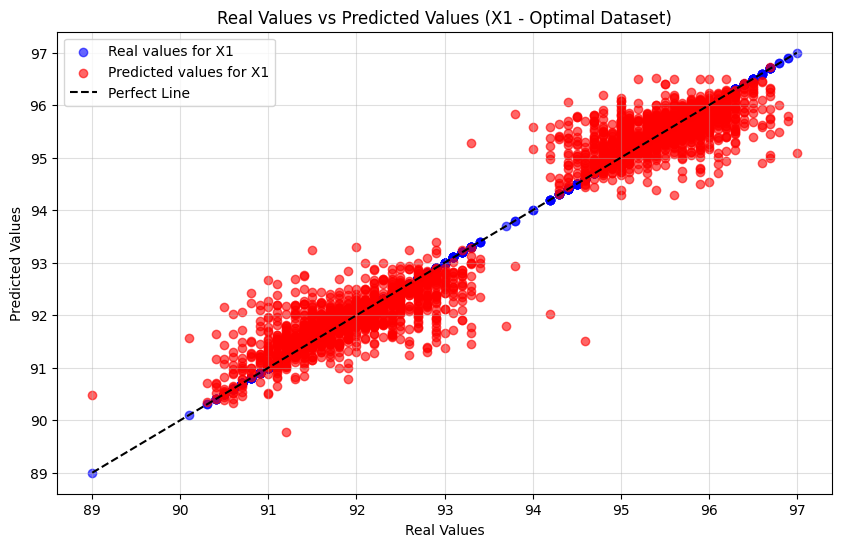

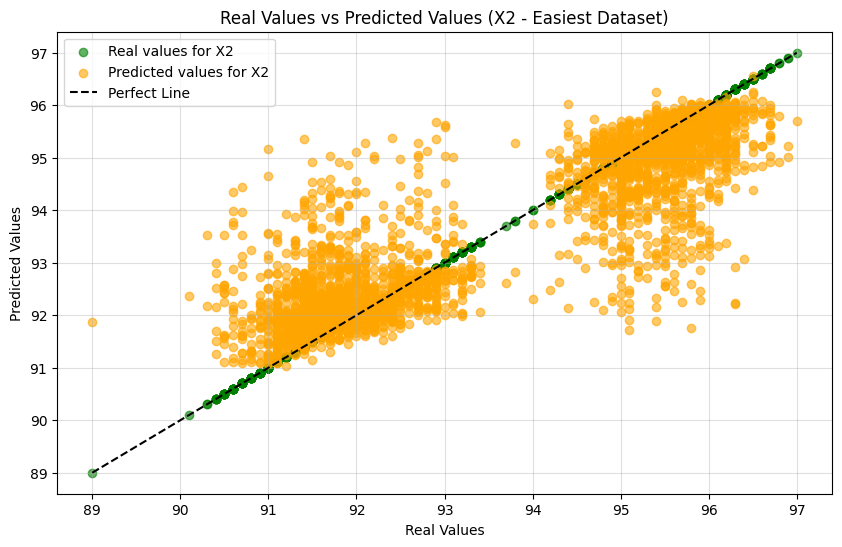

In [ ]:
# Using the results from perform grid search for y_test and y_test_pred (predicted) values for X1
y_test_X1 = results_X1["y_test"]
y_test_pred_X1 = results_X1["y_test_pred"]

# Using the results from perform grid search for y_test and y_test_pred (predicted) values for X2
y_test_X2 = results_X2["y_test"]
y_test_pred_X2 = results_X2["y_test_pred"]

# Plot for the optimal values (X1) from the dataset
plt.figure(figsize=(10, 6)) # Plot parameters
plt.scatter(y_test_X1, y_test_X1, alpha=0.6, color='blue', label='Real values for X1', marker='o') # Original values
plt.scatter(y_test_X1, y_test_pred_X1, alpha=0.6, color='red', label='Predicted values for X1', marker='o') # Predicted values
# Perfect line parameters
plt.plot([min(y_test_X1.min(), y_test_X2.min()), max(y_test_X1.max(), y_test_X2.max())],
         [min(y_test_X1.min(), y_test_X2.min()), max(y_test_X1.max(), y_test_X2.max())],
         color='black', linestyle='--', label='Perfect Line')
plt.title("Real Values vs Predicted Values (X1 - Optimal Dataset)")
plt.xlabel("Real Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.grid(alpha=0.4)
plt.show()  # Show the graph


# Plot for the easiest values to get (physical values - X2) from the dataset
plt.figure(figsize=(10, 6))
plt.scatter(y_test_X2, y_test_X2, alpha=0.6, color='green', label='Real values for X2', marker='o')
plt.scatter(y_test_X2, y_test_pred_X2, alpha=0.6, color='orange', label='Predicted values for X2', marker='o')
# Perfect line parameters
plt.plot([min(y_test_X1.min(), y_test_X2.min()), max(y_test_X1.max(), y_test_X2.max())],
         [min(y_test_X1.min(), y_test_X2.min()), max(y_test_X1.max(), y_test_X2.max())],
         color='black', linestyle='--', label='Perfect Line')
plt.title("Real Values vs Predicted Values (X2 - Easiest Dataset)")
plt.xlabel("Real Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.grid(alpha=0.4)
plt.show()

# Performance Comparison

## Regression

### Easiest dataset summary - TEST

| Model          | MAE    | MSE    | RMSE   | RMSPE (%) |
|----------------|--------|--------|--------|-----------|
| Polynomial     |1.035997|1.653718|1.051367|1.392519   |
| Ridge          |1.137557|1.874685|1.369192|1.467689   |
| Random Forest  |0.582786|0.808701|0.899278|0.962402   |

### Optimal DataSet Summary - TEST

| Model          | MAE    | MSE    | RMSE   | RMSPE (%) |
|----------------|--------|--------|--------|-----------|
| Polynomial     |0.867570|1.304054|1.141952|1.223147   |
| Ridge          |1.172323|1.991849|1.411329|1.510042   |
| Random Forest  |0.271174|0.152267|0.390214|0.416993   |

### Regression Results Analysis

As can be seen in the previous table, the best result across the board was Random Forest. Then, polynomial and finally Ridge.

First, Random Forest being the first is intuitive upon first glance, as it has the highest number of hyper parameters to vary compared to Poly (1) and ridge (1). These were varied using grid search. By tuning a higher number of parameters, we can more finely adjust the results and get a better performance.

Due to its use of several randomly constructed trees and averaging out the result, as explained in the material for this course, Random Forest is more resilient to outliers and unusual data entries. It also handles high dimensional data well, which explains why using 5 columns wasn't an issue for training. These multi-tree predictions make the variance and accuracy of the model higher, which can be reflected by analyzing the MSE, where even when not using the optimal data set values, the MSE is better than in the case of the other models that ran using the optimal dataset. This is of utmost importance as it provides a quantitative measure of the model's accuracy.

Similarly, the use of hyperparameters in the Random Forest model, allowed us to better fit the model, since they optimize the model by generating a better balance between bias and variance.

The polynomial approach can be heavily flexible to adapt to many datasets. However, it’s very sensitive to outliers and data discrepancies, which can explain why it couldn't adjust as well, especially because it doesn't have the corrective nature that comes along with using several regressions layered on top of each other like Random Forest, which can fix these deficiencies. Our dataset also spans a very small range of data compared to other applications.

In this particular case, we saw that the RMSPE didn't change considerably when upgrading the polynomial grade. This can be explained because our data is very correlated, fairly linear and not very spread out, based on the feature selection process. Because of this, even the first stage of polynomial, which is equivalent to a linear regression, provided adequate results as can be seen above. Thus, the extra fitting and non linear proofing provided by the polynomial model contributed, but not as much as it could have on a non linear data set. The performance gained was minimal compared to the resource overhead that was introduced by the increasing complexity of matrices operations.

Lastly, Ridge is a form of regularized linear regressions. This is a modified version of the first grade of the polynomial regression. As can be seen, the results are fairly similar, with 1.510979 for the first-grade polynomial (or standard linear regression) and 1.510042 on the optimal tests. Therefore, the good performance is explained by the same reason, as the data is very linear and correlated. The almost negligible benefit gotten from further elevating alpha is due to the fact that this dataset has low correlation between variables. While the correlation between the variables and the output is high, their correlation with each other is low. In cases like this, the penalty introduced by low alphas has no effect because the effect on variance is low. When the alpha is increased enough, the bias takes over. This is why the train data remains consistently above the test data, because the Ridge can't compensate the variance and thus, leads to slightly more overfitting. This also changes slightly when we use the simplified dataset, where test data is consistently better than training data, which suggests that variance is lower in those columns.  


#### Recomendations


Given these results, when not constrained by models seen in a particular course or within certain complexity, it is recommended to choose models that do well with linear setups like our dataset in regression based analysis. Avoid introducing additional complexity with high polynomial levels, for example, in datasets that don't take advantage of the added resource overhead because they are designed for more non linear relationships.

Another consideration is to avoid regularized linear models in linear datasets that don't exhibit correlation in between variables, also known as multicollinearity. These are the datasets that most benefit from a penalty that models like Ridge provide to the squared coeficients of the loss function.

## Classification

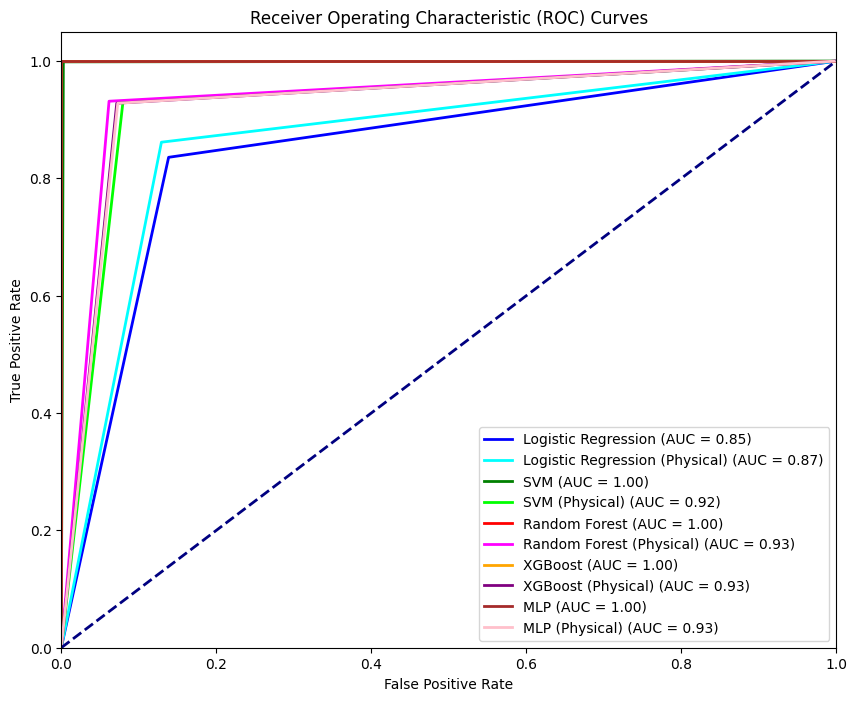

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calculate ROC curves and AUC scores
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

fpr_phy_lr, tpr_phy_lr, _ = roc_curve(y_test_phy, y_pred_phy_lr)
roc_auc_phy_lr = auc(fpr_phy_lr, tpr_phy_lr)

fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

fpr_phy_svm, tpr_phy_svm, _ = roc_curve(y_test_phy, y_pred_phy_svm)
roc_auc_phy_svm = auc(fpr_phy_svm, tpr_phy_svm)

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

fpr_phy_rf, tpr_phy_rf, _ = roc_curve(y_test_phy, y_pred_phy_rf)
roc_auc_phy_rf = auc(fpr_phy_rf, tpr_phy_rf)

fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

fpr_phy_xgb, tpr_phy_xgb, _ = roc_curve(y_test_phy, y_pred_xgb_phy)
roc_auc_phy_xgb = auc(fpr_phy_xgb, tpr_phy_xgb)

fpr_mlp, tpr_mlp, _ = roc_curve(y_test, y_pred_mlp)
roc_auc_mlp = auc(fpr_mlp, tpr_mlp)

fpr_phy_mlp, tpr_phy_mlp, _ = roc_curve(y_test_phy, y_pred_mlp_phy)
roc_auc_phy_mlp = auc(fpr_phy_mlp, tpr_phy_mlp)

# Plot ROC curves
plt.figure(figsize=(10, 8))
plt.plot(fpr_lr, tpr_lr, color='blue', lw=2, label='Logistic Regression (AUC = %0.2f)' % roc_auc_lr)
plt.plot(fpr_phy_lr, tpr_phy_lr, color='cyan', lw=2, label='Logistic Regression (Physical) (AUC = %0.2f)' % roc_auc_phy_lr)
plt.plot(fpr_svm, tpr_svm, color='green', lw=2, label='SVM (AUC = %0.2f)' % roc_auc_svm)
plt.plot(fpr_phy_svm, tpr_phy_svm, color='lime', lw=2, label='SVM (Physical) (AUC = %0.2f)' % roc_auc_phy_svm)
plt.plot(fpr_rf, tpr_rf, color='red', lw=2, label='Random Forest (AUC = %0.2f)' % roc_auc_rf)
plt.plot(fpr_phy_rf, tpr_phy_rf, color='magenta', lw=2, label='Random Forest (Physical) (AUC = %0.2f)' % roc_auc_phy_rf)
plt.plot(fpr_xgb, tpr_xgb, color='orange', lw=2, label='XGBoost (AUC = %0.2f)' % roc_auc_xgb)
plt.plot(fpr_phy_xgb, tpr_phy_xgb, color='purple', lw=2, label='XGBoost (Physical) (AUC = %0.2f)' % roc_auc_phy_xgb)
plt.plot(fpr_mlp, tpr_mlp, color='brown', lw=2, label='MLP (AUC = %0.2f)' % roc_auc_mlp)
plt.plot(fpr_phy_mlp, tpr_phy_mlp, color='pink', lw=2, label='MLP (Physical) (AUC = %0.2f)' % roc_auc_phy_mlp)

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.show()

| **Model**                   | **AUC (Optimal Dataset)** | **AUC (Easiest Dataset)** | **% Difference** |
|-----------------------------|---------------------------|---------------------------|------------------|
| **Simple Classifiers**       |                           |                           |                  |
| Logistic Regression          | 0.85                      | 0.87                      | 2.35%           |
| Support Vector Machine       | 1.00                      | 0.92                      | -8.00%            |
| Random Forest                | 1.00                      | 0.93                      | -7.00%            |
| **Advanced Classifiers**     |                           |                           |                  |
| XGBoost                      | 1.00                      | 0.93                      | -7.00%            |
| MLP                          | 1.00                      | 0.93                      | -7.00%            |


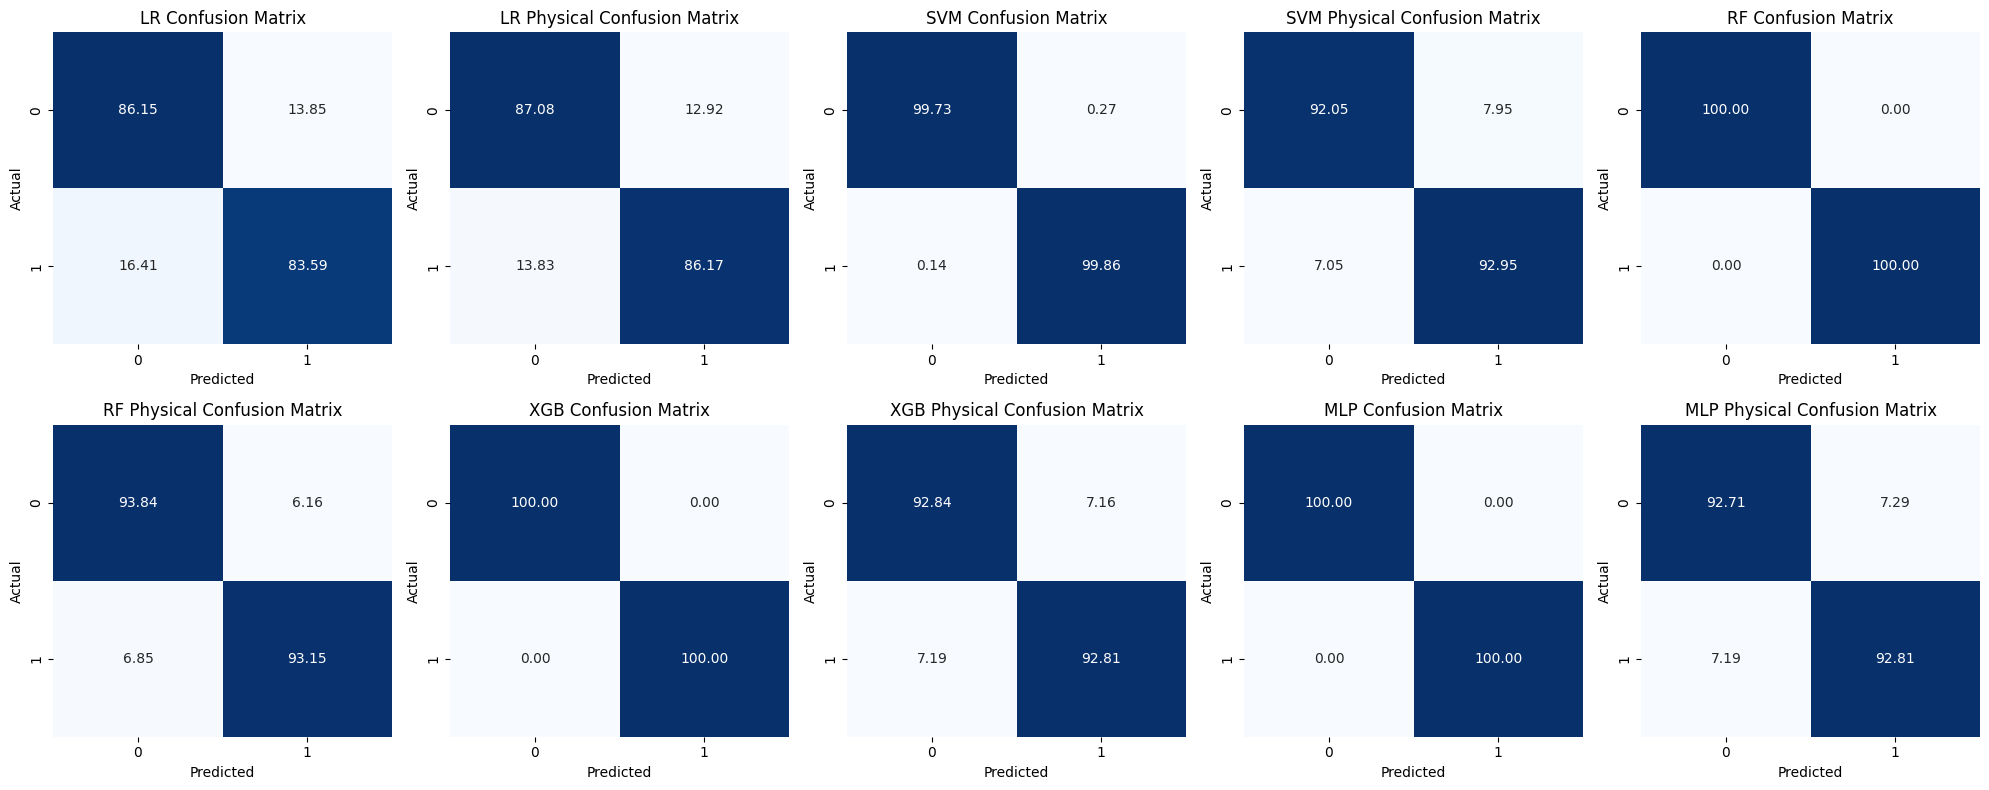

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrices(y_tests, y_preds, titles):
    fig, axes = plt.subplots(2, 5, figsize=(20, 8))
    axes = axes.ravel()
    for i, (y_test, y_pred, title) in enumerate(zip(y_tests, y_preds, titles)):
        cm = confusion_matrix(y_test, y_pred)
        cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

        sns.heatmap(cm_percentage, annot=True, fmt=".2f", cmap="Blues", ax=axes[i], cbar=False)
        axes[i].set_title(title)
        axes[i].set_xlabel("Predicted")
        axes[i].set_ylabel("Actual")
    plt.tight_layout()
    plt.show()

y_tests = [y_test, y_test_phy, y_test, y_test_phy, y_test, y_test_phy, y_test, y_test_phy, y_test, y_test_phy]
y_preds = [y_pred_lr, y_pred_phy_lr, y_pred_svm, y_pred_phy_svm, y_pred_rf, y_pred_phy_rf, y_pred_xgb, y_pred_xgb_phy, y_pred_mlp, y_pred_mlp_phy]
titles = ['LR Confusion Matrix', 'LR Physical Confusion Matrix', 'SVM Confusion Matrix', 'SVM Physical Confusion Matrix', 'RF Confusion Matrix', 'RF Physical Confusion Matrix', 'XGB Confusion Matrix', 'XGB Physical Confusion Matrix', 'MLP Confusion Matrix', 'MLP Physical Confusion Matrix']

plot_confusion_matrices(y_tests, y_preds, titles)

### Classification Results Analysis

We can see that the overall results are very good for a classifier identifying between Superior and Regular gasoline with most of the classifiers achieving > 0.90 in the AUC metric. We can see that for XGBoost, Random Forest and MLP we achieve a perfect performance when operating with Optimal Parameters. Unfortunately none of the classifiers could achieve a 100% accuracy when working with Easily Obtainable Physical Characteristics. This however is expected and the actual results are quite surprising as we could achieve a classifier with > 0.90 AUC in most cases, being the Logisitic Regression classifier the only one outside of that category.

As for the optimal dataset models, we can see that all but the Logisitc Regression Classifier can achieve a 1.00 AUC. This is expected as Logisitic Regression was chosen as a baseline for its ease to use and simple model complexity. This demostrates that the use of more complex models is not required, and will only be harmful as higher hardware and computation costs will be requried.

For the easily obtainable physical characteristics, we can see that all but the Logitic Regression achieved >0.92 AUC which is expected for the reasons outlined before.  




### Recomendations

For the task at hand, given that we have such high AUC metrics, we could pick any of the classifiers as the "best" classifiers, specially if we are using the optimal data set. However, we would also like to take into account some different things:


*   Model Complexity
*   Ease of sampling
*   Percentage of false positives for Superior Gasoline

The model complexity is important as that will define the amount of computational power required to run the classifier every time, and therefore be an added cost both in power consumption and hardware required. On the same thought how easy we can obtain some of the characteristics will also translate into fewer hardware/equipment costs so the cheaper we can get samples the better.

The percentage of false positives for Superior Gasoline is also a matter of concern as we want to avoid Regular Gasoline to be classified less often as Superior Gasoline to any damage to motor that requires high octanage.

With these three points taken into account we decide that the Random Forest classifier trained with the easy to obtain physical characteristics. As it is a relatively simple model compared to Neural Networks and XGBoost, can achieve 0.93 AUC and has a 6.16% rate of false positives for Superior Gasoline.

# Conclusions

1. Several regressors that can achieve < 2% RMSPE are presented, therefore answering the question if we can use machine learning to predict octane accurately using machine learning and data science.

2. Several classifiers achieving >0.9 AUC are presented, in other words we can accurately distinguish between Superior and Regular gasoline using data science and Machine Learning.

3. Linear models with little overhead are sufficient to accurately predict variables like gasoline octane because their physical measurements have a correlated and strong linear relationship.

4. Linear models with penalty systems are mostly useful in datasets that have correlation between the training the variables or heavy overfitting, and thus aren't as useful in models like gasoline prediction as the compensation is minimal.

5. Regression Random Forest offers greater flexibility in hyperparameter fitting, unlike polynomial and ridge regression models, which have a limited number of hyperparameters, this one allows to vary a larger number of parameters using for example grid search, thus generating a more accurate fit that allows to optimize the model in a better way, resulting in a higher performance.

6. In the case of classification, overall all models simple and complex ones achieved good results. However, there's a distinction between simple models like Logistic Regression and medium complexity models like Random Forest where performance changed from 0.87 to 0.93 AUC. There was no added benefit on using more complex models like XGBoost or Neural Network based models like MLP.

# References

[1] Autoridad Reguladora de los Servicios Públicos (ARESEP). (n.d). Histórico propiedades importantes evaluaciones calidad estaciones servicio. Retrieved from https://aresep.go.cr/datos-abiertos/historico-propiedades-importantes-evaluaciones-calidad-estaciones-servicio/

[2] Mora, C. (2024). 13 gasolineras no tuvieron buena nota sobre calidad en combustible. Retrieved from https://www.crhoy.com/nacionales/13-gasolineras-no-tuvieron-buena-nota-sobre-calidad-en-combustible/

[3] Autoridad Reguladora de los Servicios Públicos (ARESEP). (2024). ARESEP fiscaliza cadena combustibles. Retrieved from https://aresep.go.cr/noticias/aresep-fiscaliza-cadena-combustibles/

[4] Universidad de Costa Rica (UCR). (2016). Calidad de gasolina que usted compra es analizada en laboratorio de la UCR. Retrieved from https://www.ucr.ac.cr/noticias/2016/6/17/calidad-de-gasolina-que-usted-compra-es-analizada-en-laboratorio-de-la-ucr.html
